In [ ]:
#Carga del repo de Github

!git clone https://github.com/Sansote/TT1-Trabajo_Final_2025.git

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Primero importo dataset

In [59]:
df = pd.read_excel('archivo_consolidado.xlsx')  # leo consolidado
df_blue = pd.read_excel('serie dolar blue.xlsx')  # Leo serie de dolar blue
df_con_dolar_blue = pd.merge(df, df_blue, on='Date', how='left') # Mergeo con el original
df_con_dolar_blue['dolar_blue'] = df_con_dolar_blue['dolar_blue'].bfill() # rellena vacios con el anterior
df_ccl = pd.read_excel('serie dolar ccl.xlsx')
df_con_dolar_blue_ccl = pd.merge(df_con_dolar_blue, df_ccl, on='Date', how='left') # Mergeo con el original
df_con_dolar_blue_ccl['dolar_ccl'] = df_con_dolar_blue_ccl['dolar_ccl'].bfill()
df_oficial = pd.read_excel('serie_dolar_oficial.xlsx')
df_con_dolar_completo = pd.merge(df_con_dolar_blue_ccl, df_oficial, on='Date', how='left') # Mergeo con el original
df_con_dolar_completo['dolar_oficial'] = df_con_dolar_completo['dolar_oficial'].bfill() # rellena vacios con el anterior
df_con_dolar_completo.head()




Date  Close_ALUA.BA  High_ALUA.BA  Low_ALUA.BA  Open_ALUA.BA  \
0 2025-04-07          787.0         793.0        741.0         782.0   
1 2025-04-04          793.0         799.0        733.0         798.0   
2 2025-04-03          815.0         865.0        804.0         845.0   
3 2025-04-01          866.0         885.0        851.0         881.0   
4 2025-03-31          881.0         885.0        845.0         860.0   

   Volume_ALUA.BA  Close_BBAR.BA  High_BBAR.BA  Low_BBAR.BA  Open_BBAR.BA  \
0          745887         6700.0        7220.0       6600.0        6700.0   
1         1002353         7080.0        7550.0       6770.0        7550.0   
2          757022         7820.0        7920.0       7720.0        7920.0   
3          769946         8000.0        8140.0       7880.0        8000.0   
4          645803         7950.0        8140.0       7820.0        8000.0   

   ...  Open_VALO.BA  Volume_VALO.BA  Close_YPFD.BA  High_YPFD.BA  \
0  ...         288.0         1852161        38600.0       41350.0   
1  ...         306.5         1225646        40150.0       41000.0   
2  ...         307.0          970416        44250.0       45150.0   
3  ...         310.0         1522804        46375.0       47300.0   
4  ...         319.5         2435609        46150.0       47000.0   

   Low_YPFD.BA  Open_YPFD.BA  Volume_YPFD.BA  dolar_blue  dolar_ccl  \
0      38000.0       39150.0          940957      1345.0    1360.25   
1      38425.0       41000.0         1258114      1310.0    1337.05   
2      44150.0       45000.0          490508      1310.0    1320.37   
3      45775.0       46200.0          253632      1315.0    1307.92   
4      45000.0       46350.0          306124      1325.0    1319.46   

   dolar_oficial  
0      1076.3333  
1      1075.8750  
2      1074.8333  
3      1074.5417  
4      1073.8750  

[5 rows x 109 columns]

In [60]:
#Guardo una salida
df_con_dolar_completo.to_excel('salida_con_dolar_completo.xlsx', index=False)

In [61]:
# Agrego retornos logaritmicos
close_cols = [col for col in df_con_dolar_completo.columns if 'close' in col.lower()]
for col in close_cols:
    df_con_dolar_completo[f'{col}_ret_log'] = np.log(df_con_dolar_completo[col] /df_con_dolar_completo[col].shift(1))

df_con_dolar_completo.to_excel('salida_con_ret_log.xlsx', index=False)

In [62]:
ret_log_cols = [col for col in df_con_dolar_completo.columns if 'ret_log' in col.lower()]

## Calculo medidas descriptivas sobre el retorno logaritmico

In [63]:
resumen = pd.DataFrame()
for col in ret_log_cols:
    serie_filtrada = df_con_dolar_completo[col][df_con_dolar_completo[col] != 0]
    resumen.loc[col, 'min'] = serie_filtrada.min()
    resumen.loc[col, 'max'] = serie_filtrada.max()
    resumen.loc[col, 'mean'] = serie_filtrada.mean()
    resumen.loc[col, 'median'] = serie_filtrada.median()
    resumen.loc[col, 'std'] = serie_filtrada.std()
    resumen.loc[col, 'Q1'] = serie_filtrada.quantile(0.25)
    resumen.loc[col, 'Q3'] = serie_filtrada.quantile(0.75)

In [64]:
resumen.to_excel('resumen.xlsx', index=True)

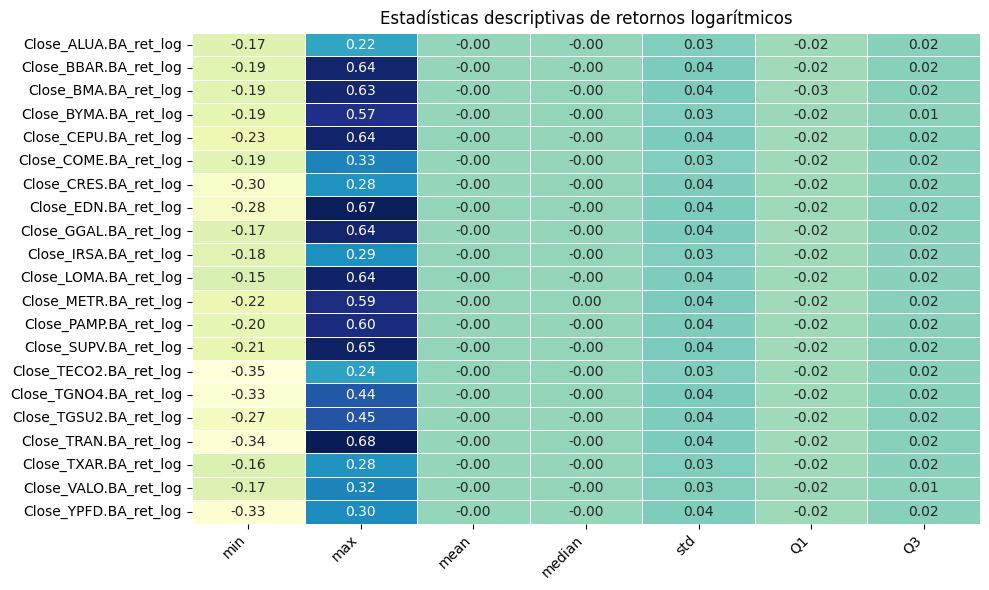

In [65]:
#Agrego formatos
plt.figure(figsize=(10, 6))
sns.heatmap(resumen, annot=True, fmt=".2f", cmap="YlGnBu", cbar=False, linewidths=0.5, linecolor='white')
plt.title("Estadísticas descriptivas de retornos logarítmicos")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [66]:
styled = resumen.style\
    .background_gradient(cmap='YlGnBu', axis=0)\
    .format("{:.2f}")\
    .set_caption("Estadísticas descriptivas de retornos logarítmicos")\
    .set_properties(**{'text-align': 'center'})

styled


In [67]:
styled.to_excel("estadisticas_descriptivas.xlsx")

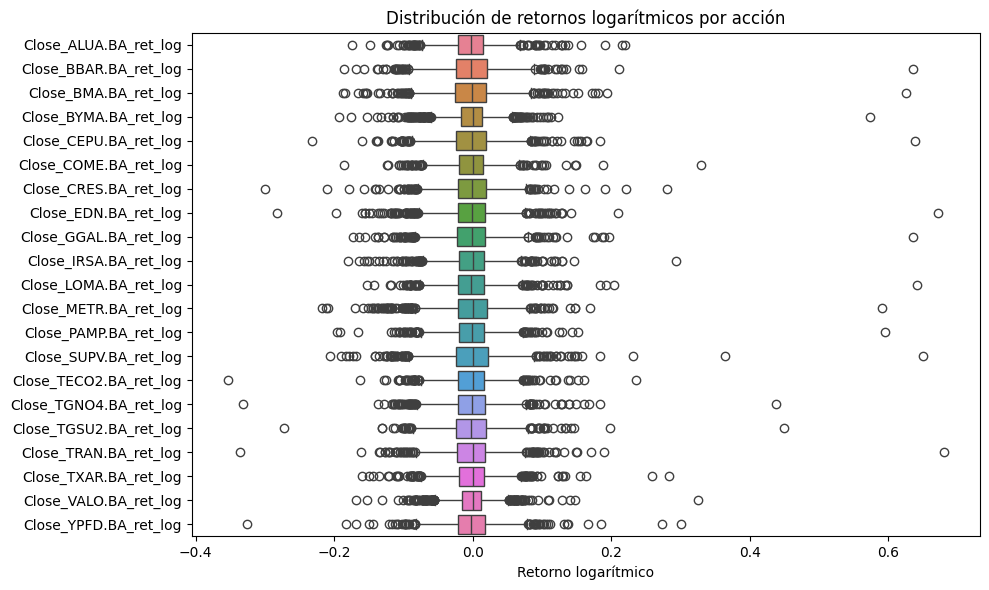

In [68]:
# Armo diagrama de box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_con_dolar_completo[ret_log_cols], orient='h')  # o orient='v'
plt.title('Distribución de retornos logarítmicos por acción')
plt.xlabel('Retorno logarítmico')
plt.tight_layout()
plt.show()


## Analizo las correlaciones de las acciones

In [71]:
df = pd.read_excel('archivo_consolidado.xlsx')  # leo consolidado
df_blue = pd.read_excel('serie dolar blue.xlsx')  # Leo serie de dolar blue
df_con_dolar_blue = pd.merge(df, df_blue, on='Date', how='left') # Mergeo con el original
df_con_dolar_blue['dolar_blue'] = df_con_dolar_blue['dolar_blue'].bfill() # rellena vacios con el anterior
df_ccl = pd.read_excel('serie dolar ccl.xlsx')
df_con_dolar_blue_ccl = pd.merge(df_con_dolar_blue, df_ccl, on='Date', how='left') # Mergeo con el original
df_con_dolar_blue_ccl['dolar_ccl'] = df_con_dolar_blue_ccl['dolar_ccl'].bfill()
df_oficial = pd.read_excel('serie_dolar_oficial.xlsx')
df_con_dolar_completo = pd.merge(df_con_dolar_blue_ccl, df_oficial, on='Date', how='left') # Mergeo con el original
df_con_dolar_completo['dolar_oficial'] = df_con_dolar_completo['dolar_oficial'].bfill() # rellena vacios con el anterior
df_con_dolar_completo.head()

Date  Close_ALUA.BA  High_ALUA.BA  Low_ALUA.BA  Open_ALUA.BA  \
0 2025-04-07          787.0         793.0        741.0         782.0   
1 2025-04-04          793.0         799.0        733.0         798.0   
2 2025-04-03          815.0         865.0        804.0         845.0   
3 2025-04-01          866.0         885.0        851.0         881.0   
4 2025-03-31          881.0         885.0        845.0         860.0   

   Volume_ALUA.BA  Close_BBAR.BA  High_BBAR.BA  Low_BBAR.BA  Open_BBAR.BA  \
0          745887         6700.0        7220.0       6600.0        6700.0   
1         1002353         7080.0        7550.0       6770.0        7550.0   
2          757022         7820.0        7920.0       7720.0        7920.0   
3          769946         8000.0        8140.0       7880.0        8000.0   
4          645803         7950.0        8140.0       7820.0        8000.0   

   ...  Open_VALO.BA  Volume_VALO.BA  Close_YPFD.BA  High_YPFD.BA  \
0  ...         288.0         1852161        38600.0       41350.0   
1  ...         306.5         1225646        40150.0       41000.0   
2  ...         307.0          970416        44250.0       45150.0   
3  ...         310.0         1522804        46375.0       47300.0   
4  ...         319.5         2435609        46150.0       47000.0   

   Low_YPFD.BA  Open_YPFD.BA  Volume_YPFD.BA  dolar_blue  dolar_ccl  \
0      38000.0       39150.0          940957      1345.0    1360.25   
1      38425.0       41000.0         1258114      1310.0    1337.05   
2      44150.0       45000.0          490508      1310.0    1320.37   
3      45775.0       46200.0          253632      1315.0    1307.92   
4      45000.0       46350.0          306124      1325.0    1319.46   

   dolar_oficial  
0      1076.3333  
1      1075.8750  
2      1074.8333  
3      1074.5417  
4      1073.8750  

[5 rows x 109 columns]

In [72]:
# Lista de columnas de precios de cierre de acciones
acciones_close = [col for col in df_con_dolar_completo.columns if 'close' in col.lower()]

# Lista de columnas de tipo de cambio
dolares = [col for col in df_con_dolar_completo.columns if 'dolar' in col.lower()]

# Subset de datos para correlación
cols_interes = acciones_close + dolares
df_corr = df_con_dolar_completo[cols_interes]

# Opcional: eliminar filas con NaN
df_corr = df_corr.dropna()

# Calcular la matriz de correlación
matriz_correlacion = df_corr.corr()

# Extraer solo las correlaciones entre acciones y dólares
correlaciones = matriz_correlacion.loc[acciones_close, dolares]


In [73]:
matriz_correlacion

Close_ALUA.BA  Close_BBAR.BA  Close_BMA.BA  Close_BYMA.BA  \
Close_ALUA.BA        1.000000       0.782038      0.819080       0.892293   
Close_BBAR.BA        0.782038       1.000000      0.990179       0.967889   
Close_BMA.BA         0.819080       0.990179      1.000000       0.981543   
Close_BYMA.BA        0.892293       0.967889      0.981543       1.000000   
Close_CEPU.BA        0.934202       0.941892      0.961169       0.988010   
Close_COME.BA        0.855343       0.925596      0.960262       0.949583   
Close_CRES.BA        0.941063       0.938422      0.952976       0.983207   
Close_EDN.BA         0.861608       0.970778      0.971898       0.971808   
Close_GGAL.BA        0.816382       0.993140      0.997520       0.978077   
Close_IRSA.BA        0.904738       0.963875      0.979706       0.988418   
Close_LOMA.BA        0.921943       0.953007      0.962532       0.984831   
Close_METR.BA        0.793303       0.975380      0.967371       0.954536   
Close_PAMP.BA        0.911061       0.962406      0.970438       0.983719   
Close_SUPV.BA        0.773909       0.996721      0.986811       0.966157   
Close_TECO2.BA       0.913941       0.954559      0.965871       0.985144   
Close_TGNO4.BA       0.890318       0.962693      0.981831       0.988183   
Close_TGSU2.BA       0.905043       0.967135      0.979761       0.991986   
Close_TRAN.BA        0.884576       0.968006      0.983533       0.989140   
Close_TXAR.BA        0.997391       0.784882      0.822983       0.897250   
Close_VALO.BA        0.920922       0.942063      0.965113       0.987482   
Close_YPFD.BA        0.870239       0.981963      0.985860       0.988813   
dolar_blue           0.979216       0.837844      0.871915       0.932310   
dolar_ccl            0.979260       0.833611      0.868163       0.931372   
dolar_oficial        0.932341       0.909950      0.939736       0.975456   

                Close_CEPU.BA  Close_COME.BA  Close_CRES.BA  Close_EDN.BA  \
Close_ALUA.BA        0.934202       0.855343       0.941063      0.861608   
Close_BBAR.BA        0.941892       0.925596       0.938422      0.970778   
Close_BMA.BA         0.961169       0.960262       0.952976      0.971898   
Close_BYMA.BA        0.988010       0.949583       0.983207      0.971808   
Close_CEPU.BA        1.000000       0.947552       0.996260      0.976424   
Close_COME.BA        0.947552       1.000000       0.934215      0.931050   
Close_CRES.BA        0.996260       0.934215       1.000000      0.976501   
Close_EDN.BA         0.976424       0.931050       0.976501      1.000000   
Close_GGAL.BA        0.960522       0.954690       0.954299      0.978270   
Close_IRSA.BA        0.992069       0.964810       0.989312      0.984260   
Close_LOMA.BA        0.992337       0.940258       0.994039      0.981955   
Close_METR.BA        0.946329       0.901168       0.946074      0.986123   
Close_PAMP.BA        0.991466       0.948817       0.992003      0.987099   
Close_SUPV.BA        0.938510       0.914397       0.935276      0.968471   
Close_TECO2.BA       0.993646       0.937211       0.993885      0.985287   
Close_TGNO4.BA       0.989883       0.970289       0.982255      0.981122   
Close_TGSU2.BA       0.993157       0.960444       0.989885      0.981573   
Close_TRAN.BA        0.989227       0.959040       0.983361      0.986735   
Close_TXAR.BA        0.937048       0.859340       0.942554      0.862825   
Close_VALO.BA        0.991587       0.964048       0.985831      0.965709   
Close_YPFD.BA        0.983237       0.944033       0.981802      0.990101   
dolar_blue           0.955092       0.905678       0.956962      0.888277   
dolar_ccl            0.955698       0.899329       0.956906      0.887672   
dolar_oficial        0.984566       0.945336       0.977697      0.945489   

                Close_GGAL.BA  Close_IRSA.BA  ...  Close_TECO2.BA  \
Close_ALUA.BA        0.816382       0.904738  ...        0.913941   
Close_BBAR.BA        0.993

<Axes: >

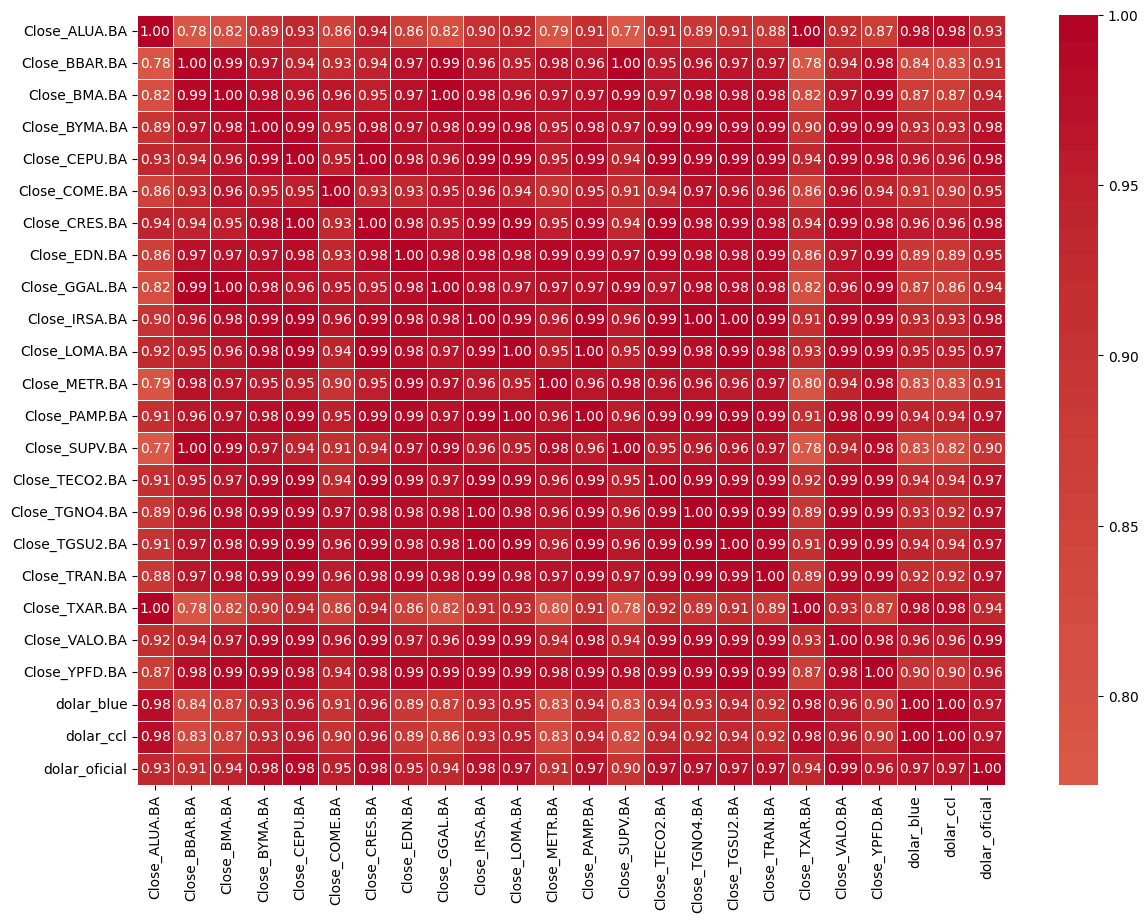

In [74]:
# Agrego formato al correlograma
plt.figure(figsize=(14, 10))
sns.heatmap(matriz_correlacion,
            annot=True,
            fmt=".2f",
            cmap="coolwarm",
            center=0,
            linewidths=0.5,
            linecolor='white')

In [76]:
#calculo retornos de nuevo
close_cols = [col for col in df_con_dolar_completo.columns if 'close' in col.lower()]
for col in close_cols:
    df_con_dolar_completo[f'{col}_ret_log'] = np.log(df_con_dolar_completo[col] /df_con_dolar_completo[col].shift(1))

df_con_dolar_completo.to_excel('salida_con_ret_log.xlsx', index=False)

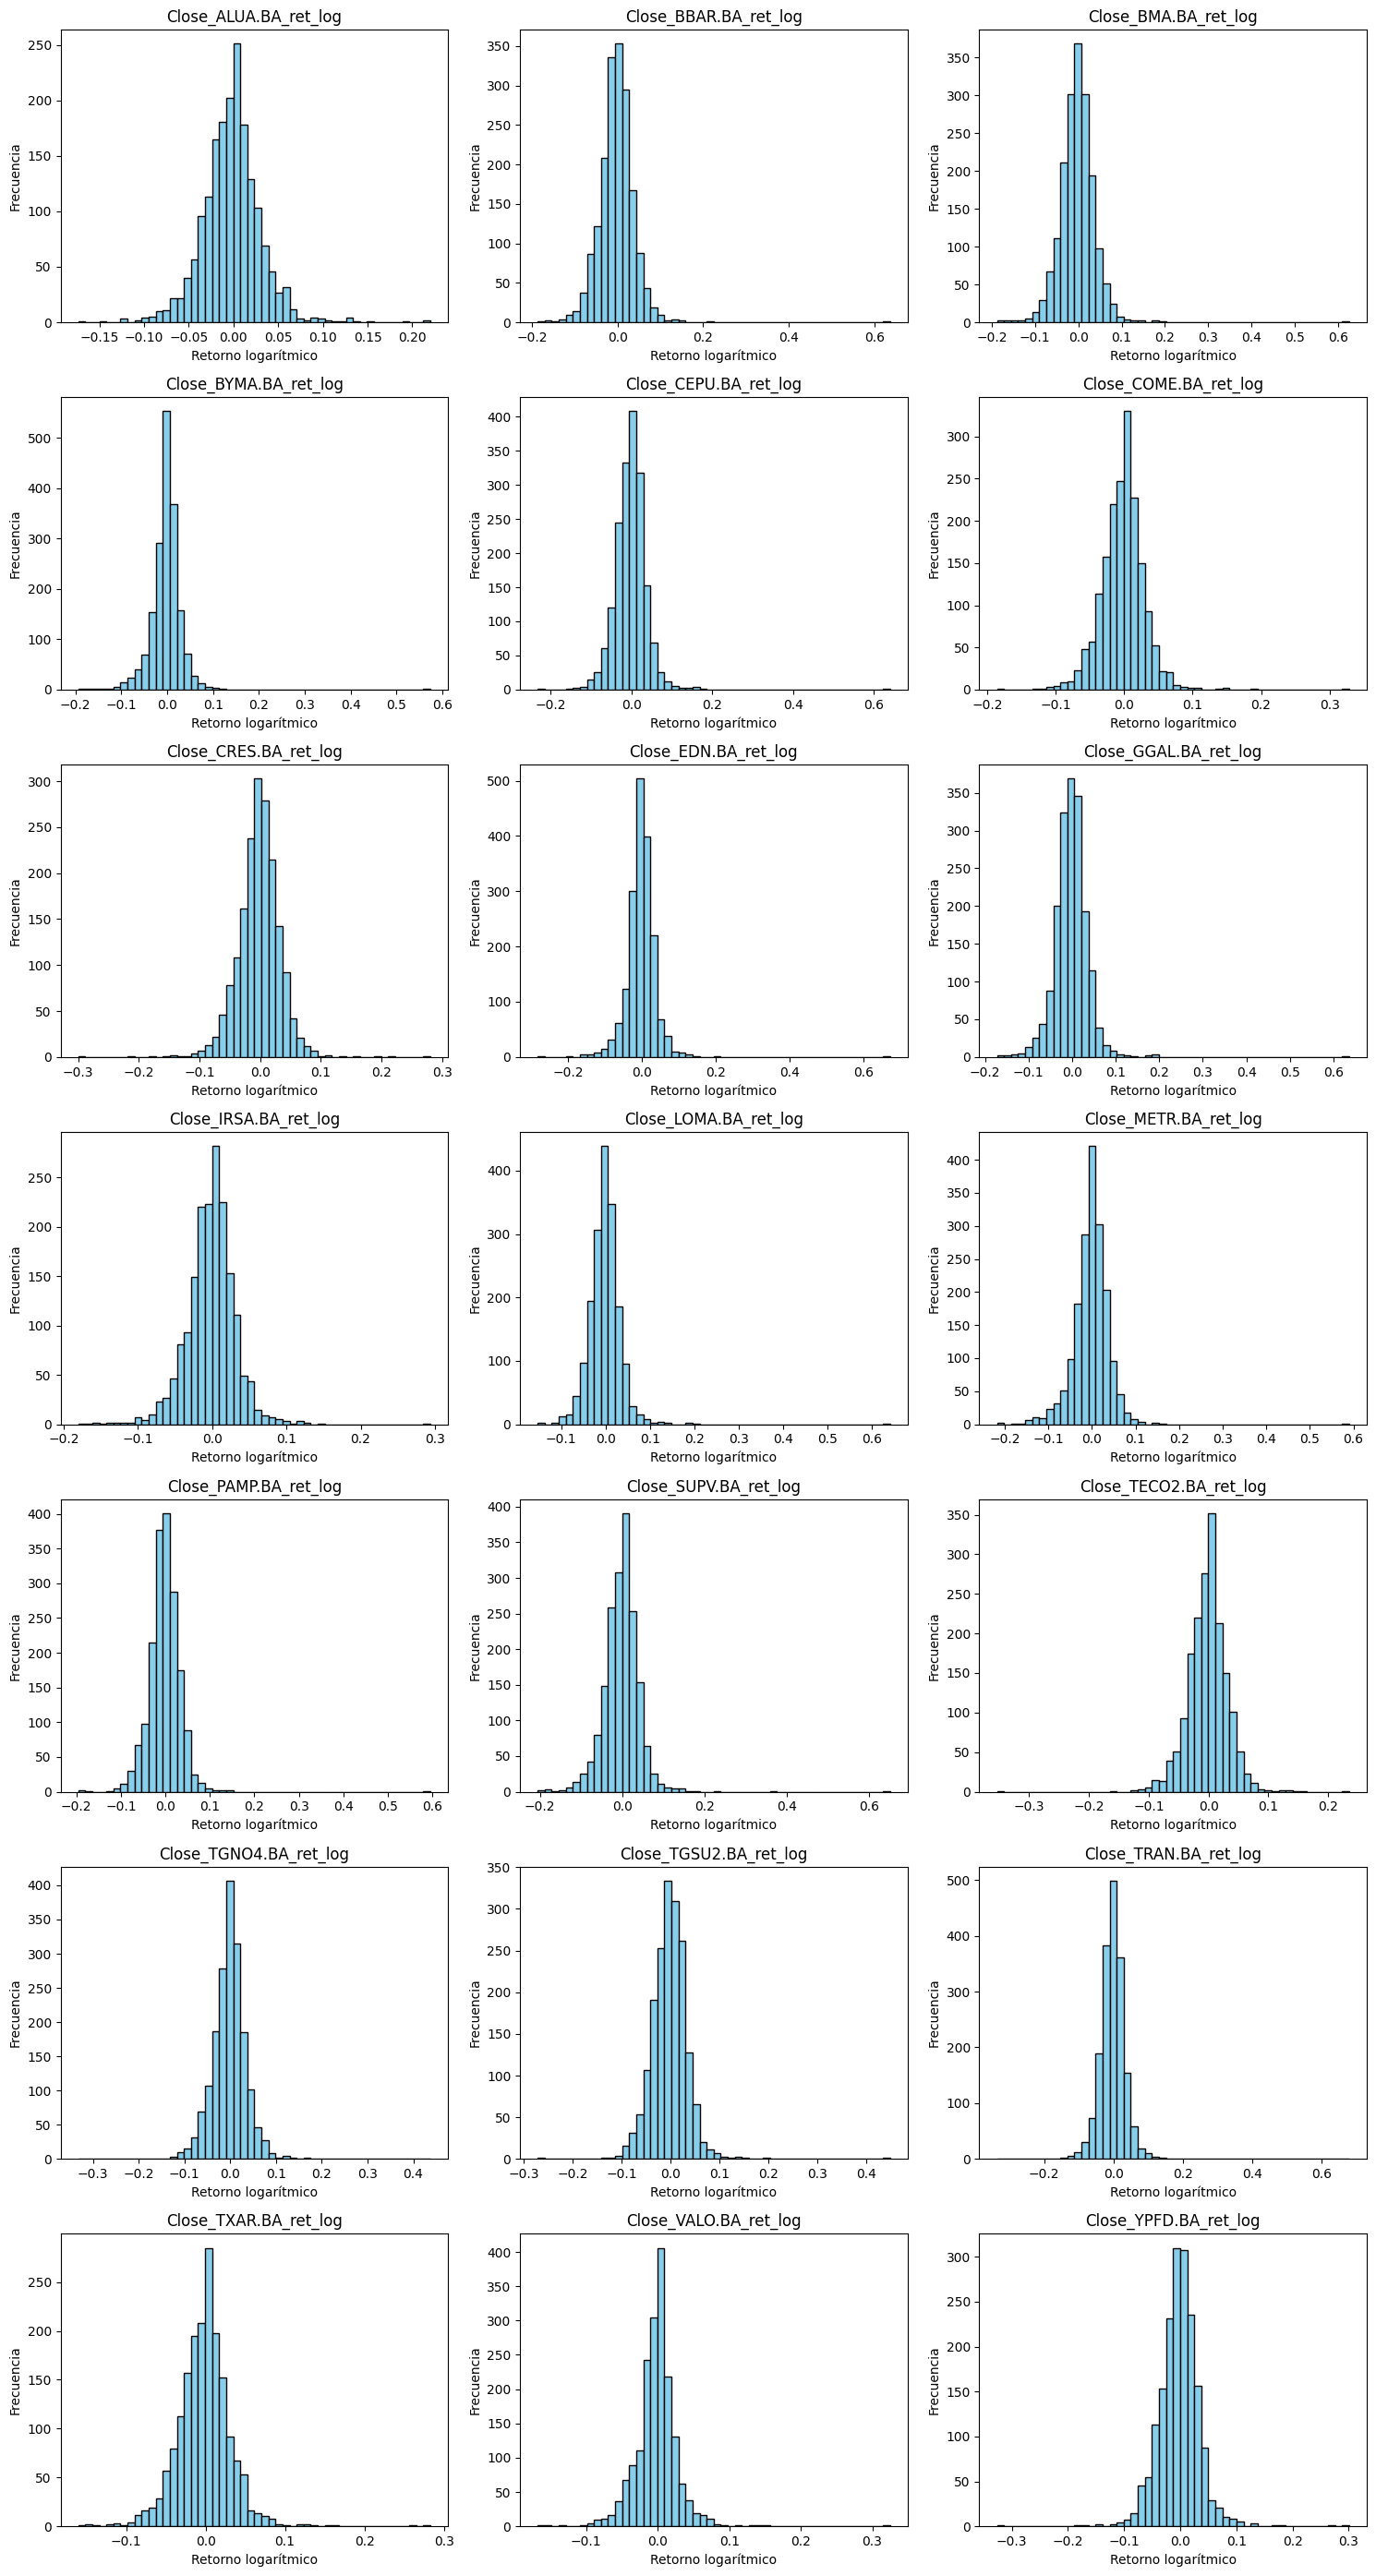

In [77]:
# Armo histogramas

cols = ret_log_cols
n = len(cols)

ncols = 3
nrows = -(-n // ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5*ncols, 4*nrows))
axes = axes.flatten()

for i, col in enumerate(cols):
    axes[i].hist(df_con_dolar_completo[col].dropna(), bins=50, color='skyblue', edgecolor='black')
    axes[i].set_title(col)
    axes[i].set_xlabel("Retorno logarítmico")
    axes[i].set_ylabel("Frecuencia")

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


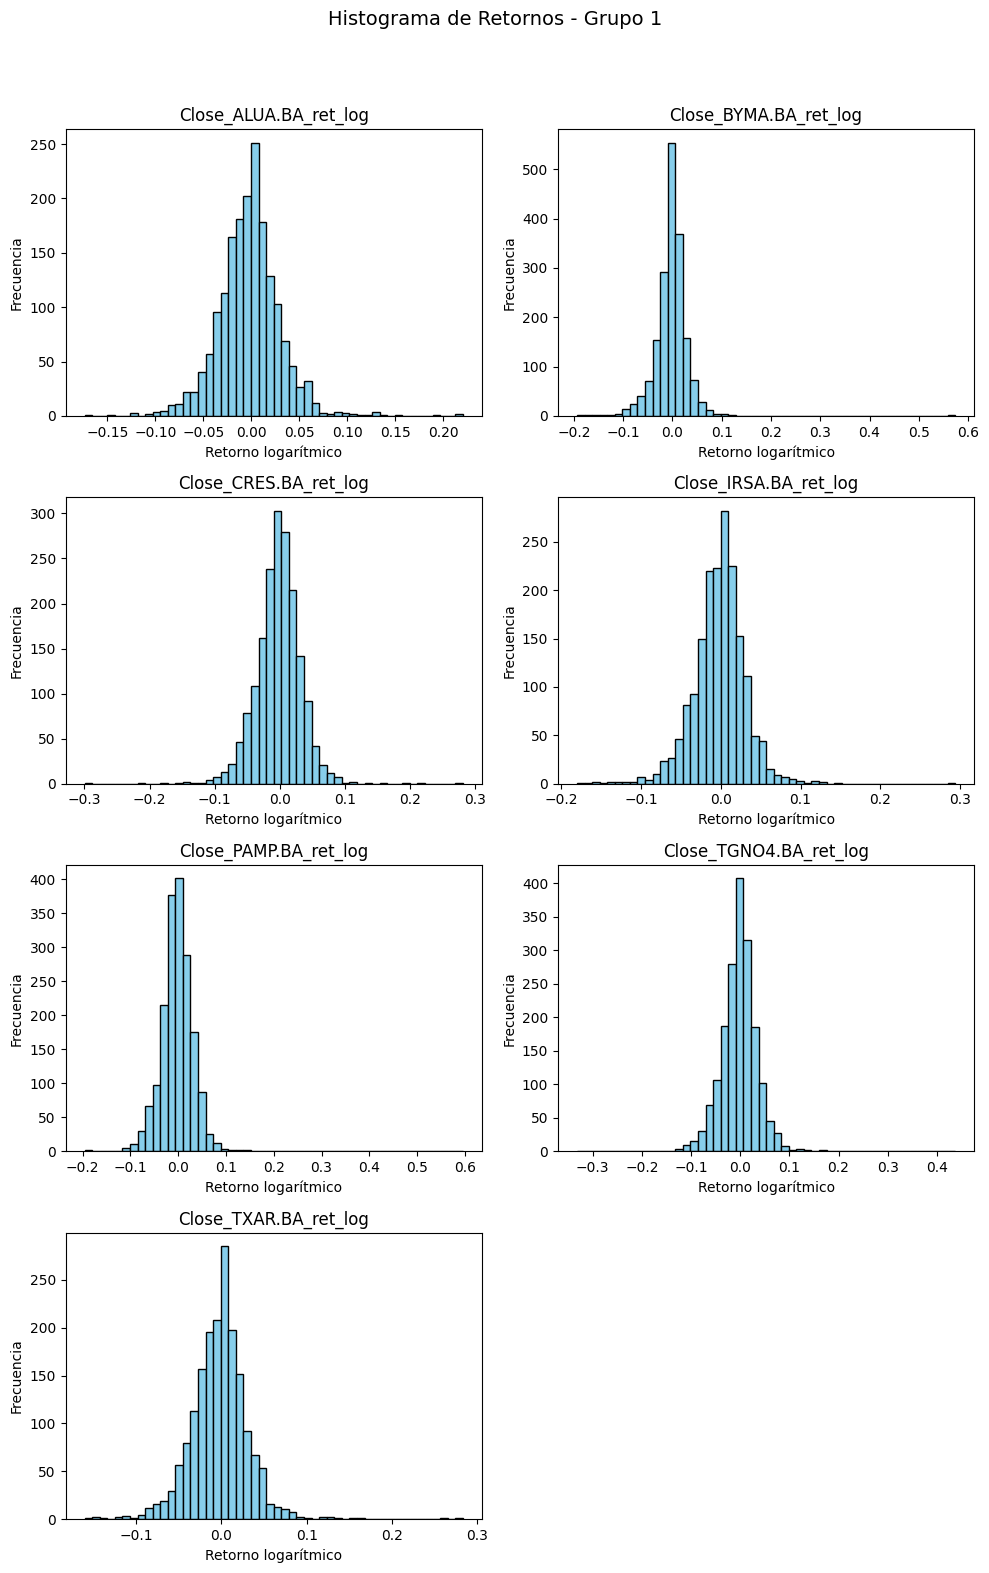

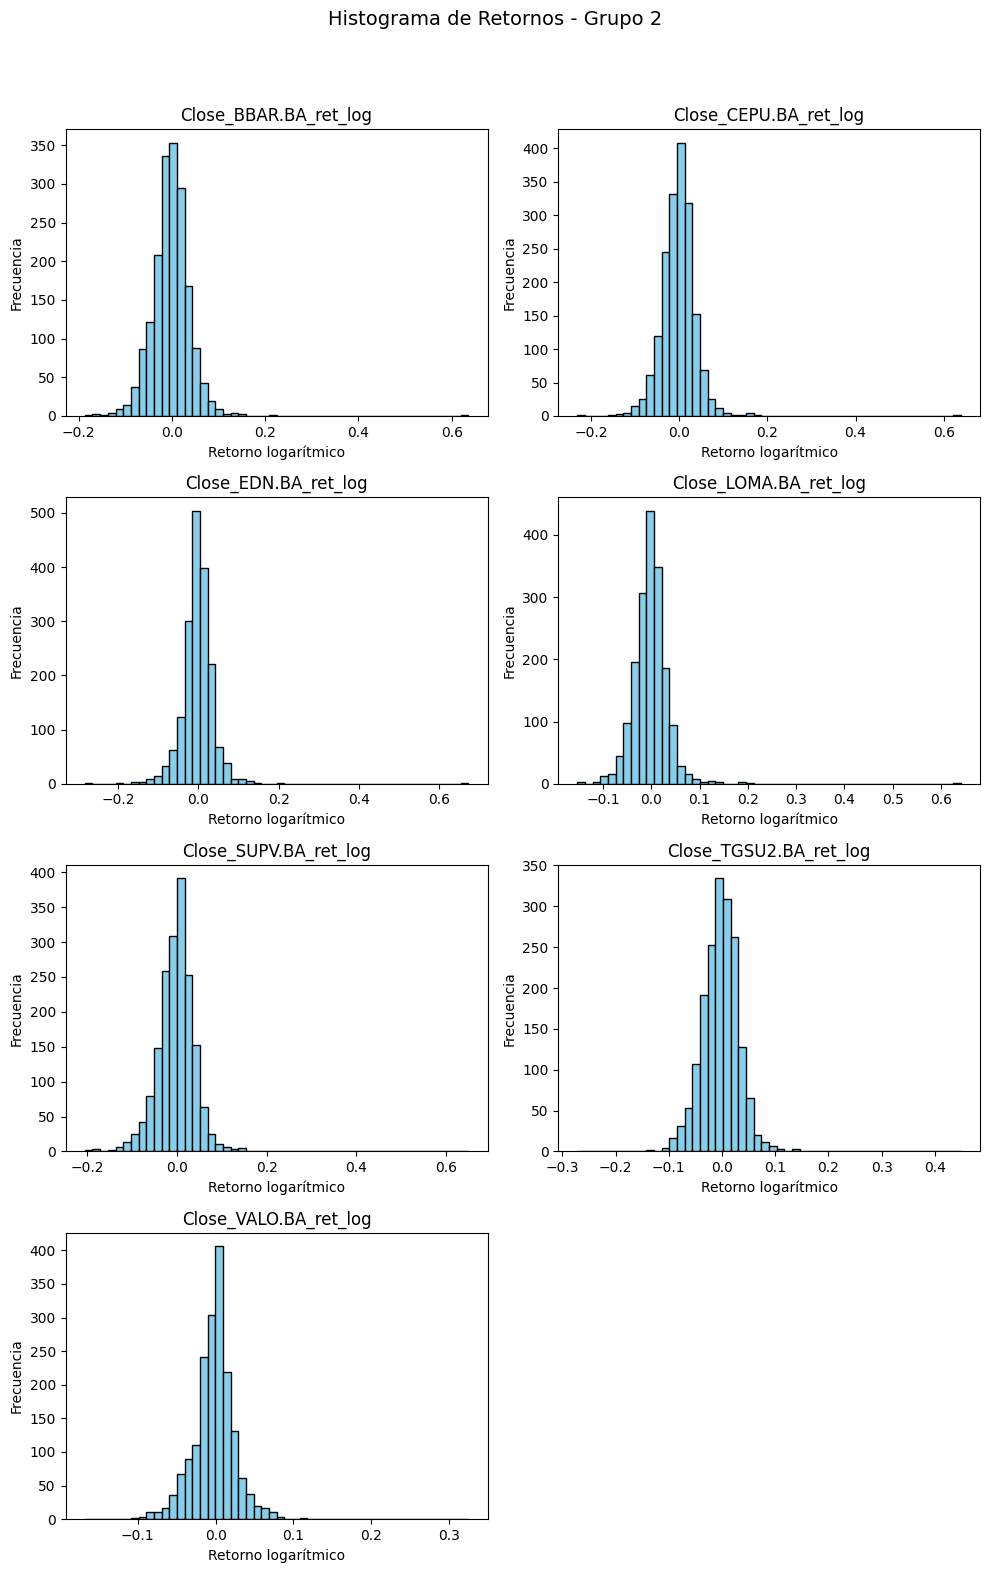

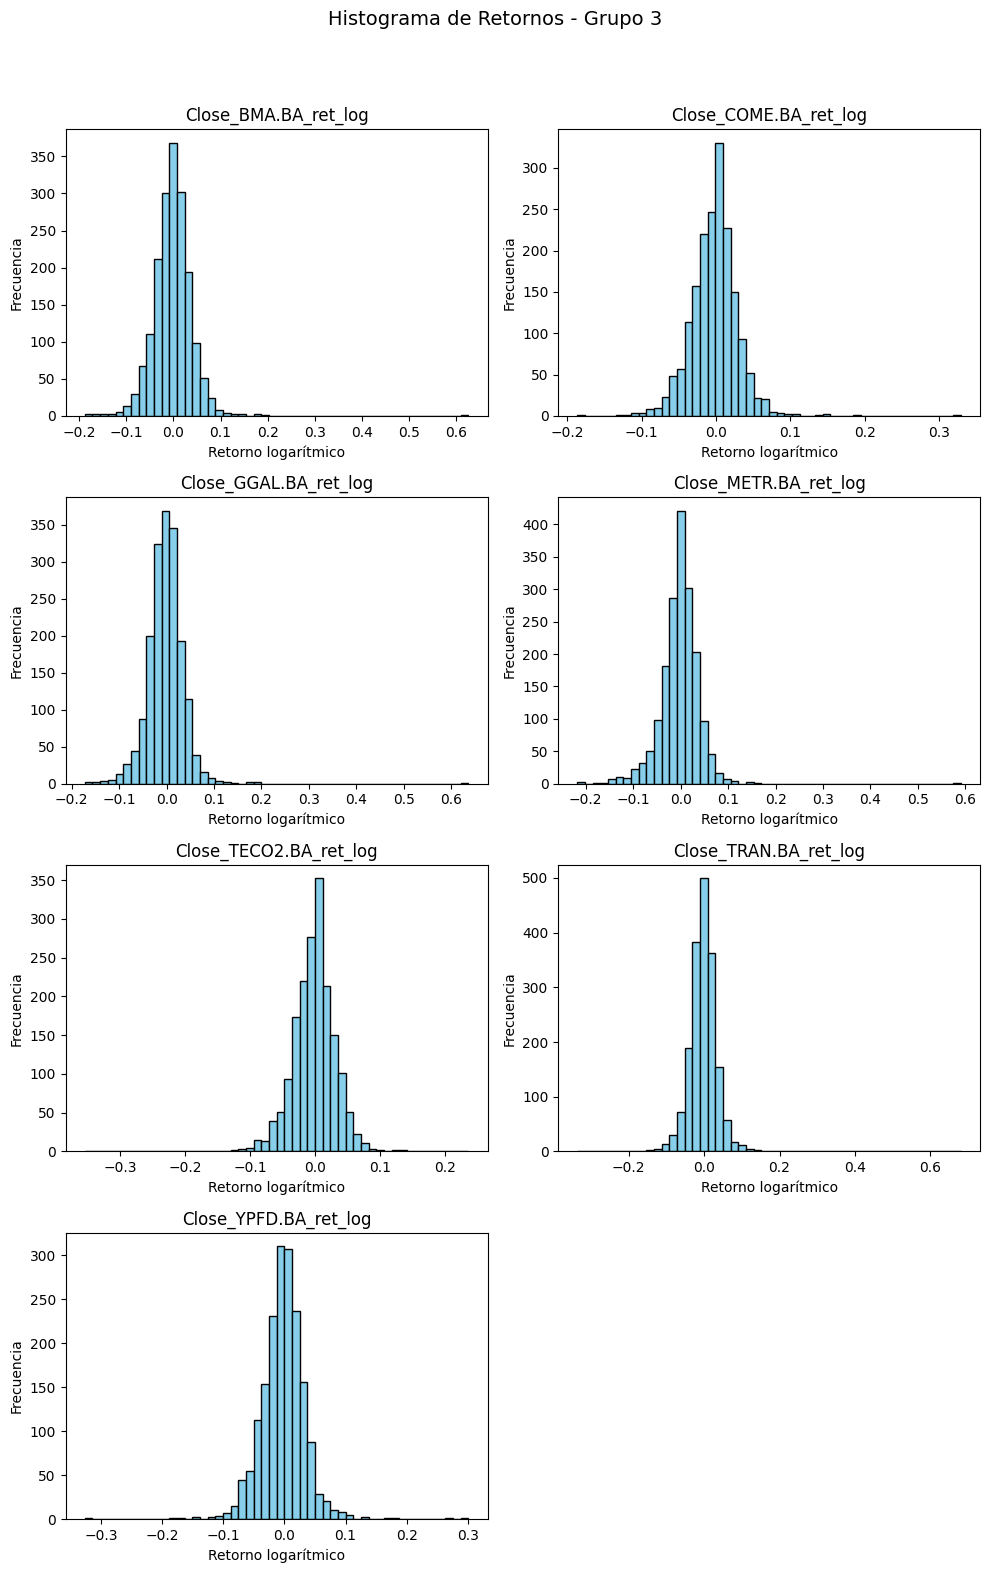

In [78]:



cols = ret_log_cols

# Dividimos en 3 partes aproximadamente iguales
chunks = [cols[i::3] for i in range(3)]  # genera 3 grupos intercalados

for idx, group in enumerate(chunks, start=1):
    n = len(group)
    ncols = 2
    nrows = -(-n // ncols)

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 4 * nrows))
    axes = axes.flatten()

    for i, col in enumerate(group):
        axes[i].hist(df_con_dolar_completo[col].dropna(), bins=50, color='skyblue', edgecolor='black')
        axes[i].set_title(col)
        axes[i].set_xlabel("Retorno logarítmico")
        axes[i].set_ylabel("Frecuencia")


    for j in range(len(group), len(axes)):
        fig.delaxes(axes[j])

    fig.suptitle(f'Histograma de Retornos - Grupo {idx}', fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


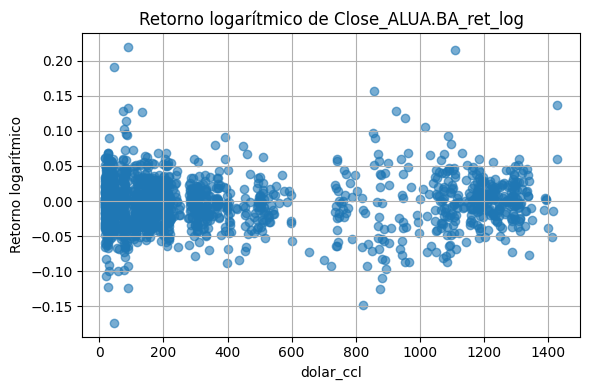

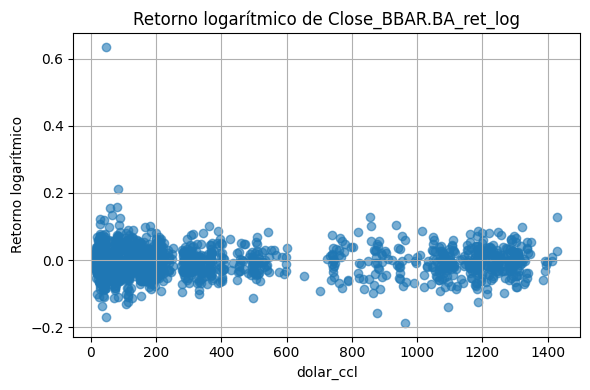

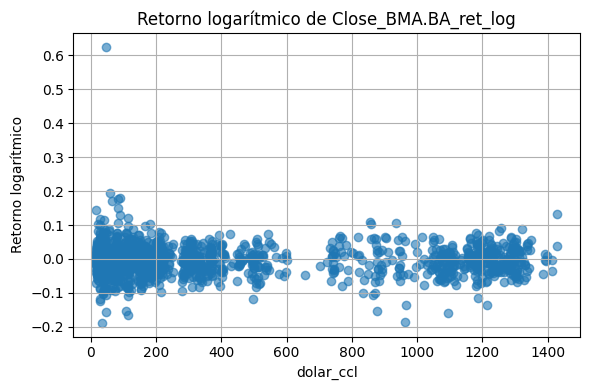

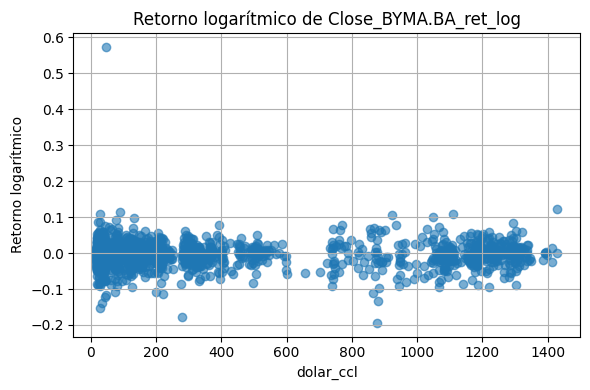

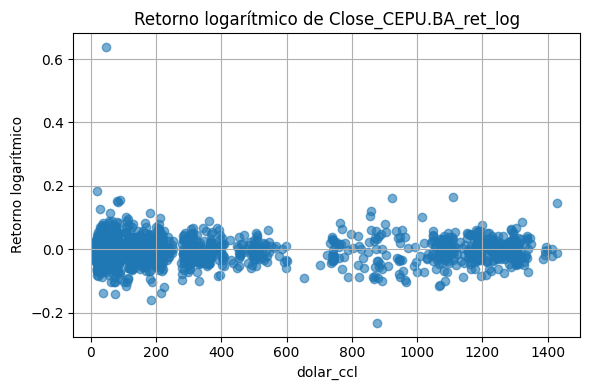

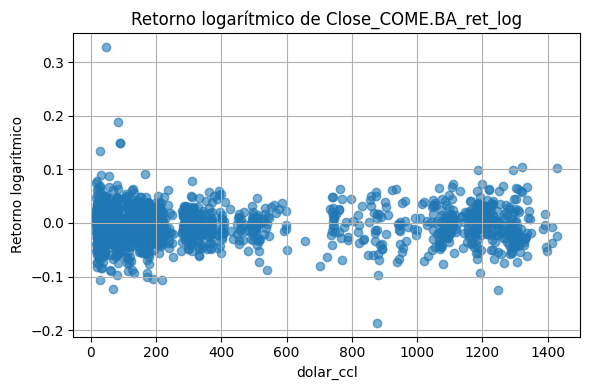

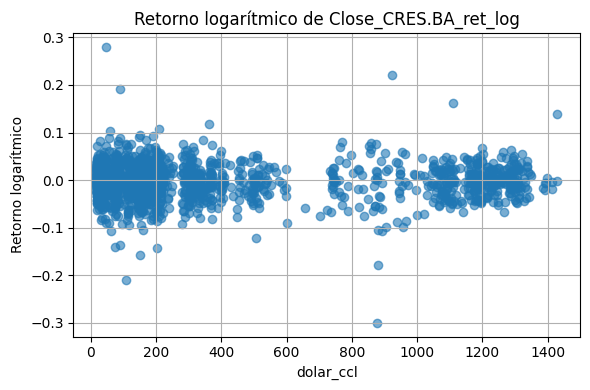

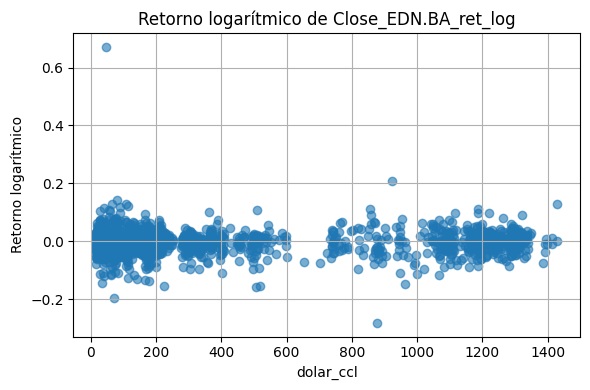

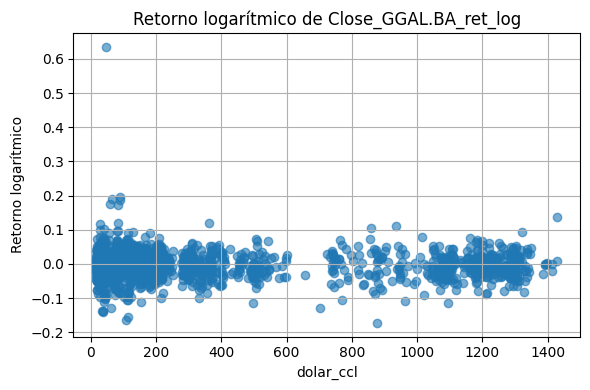

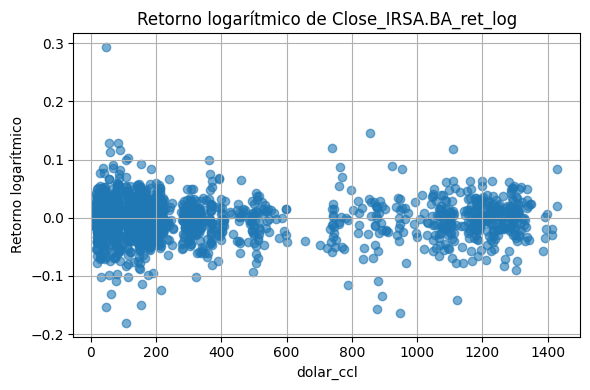

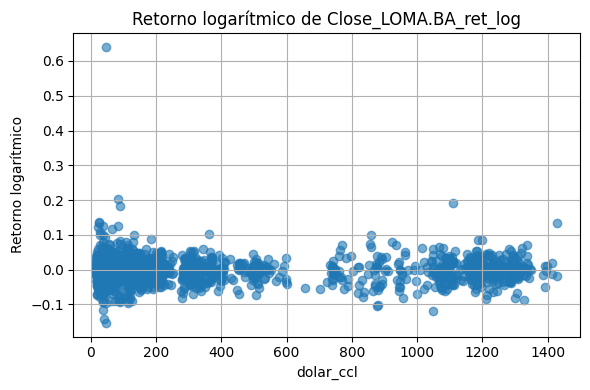

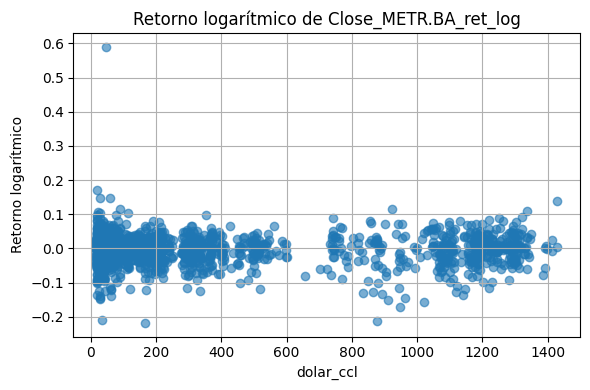

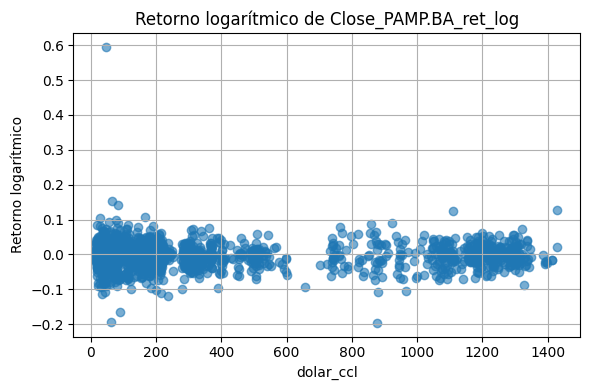

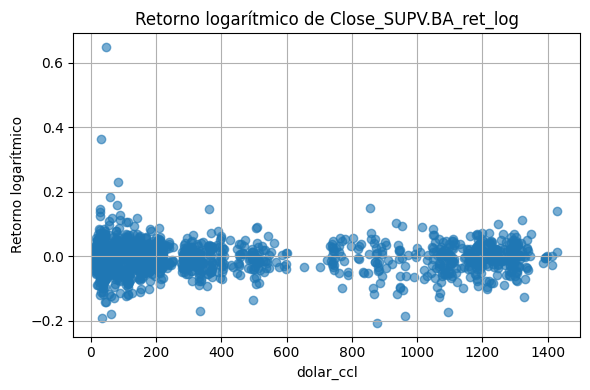

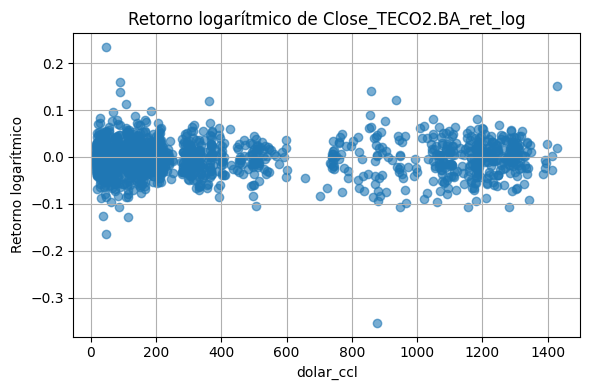

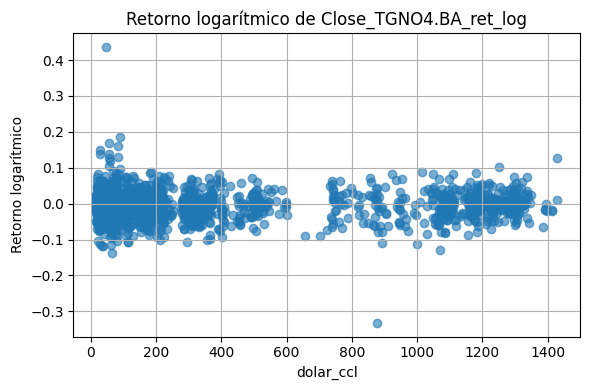

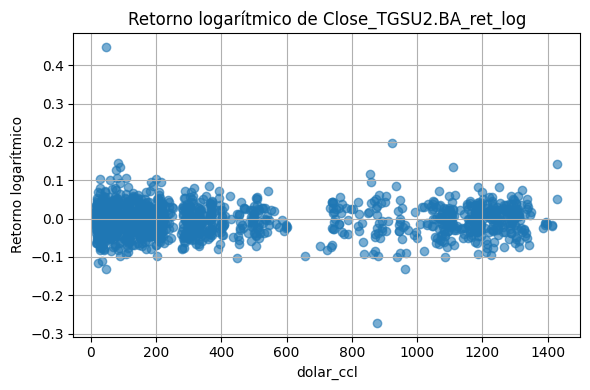

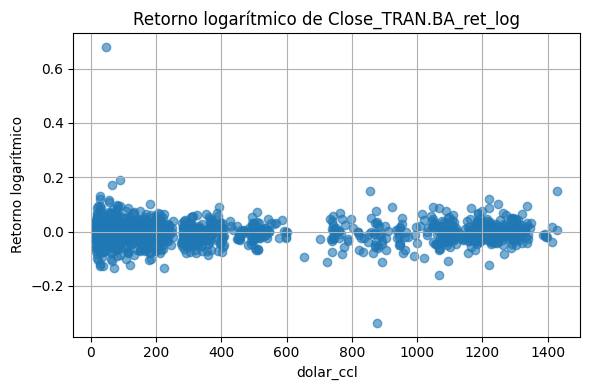

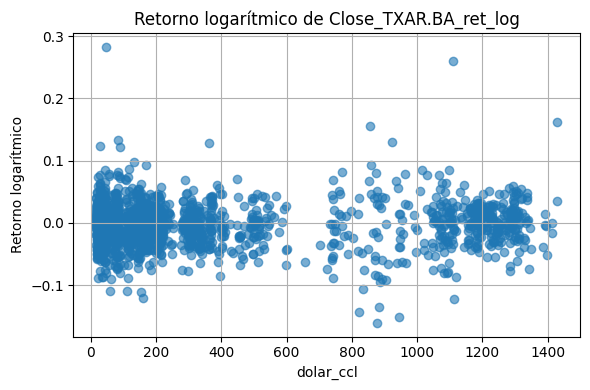

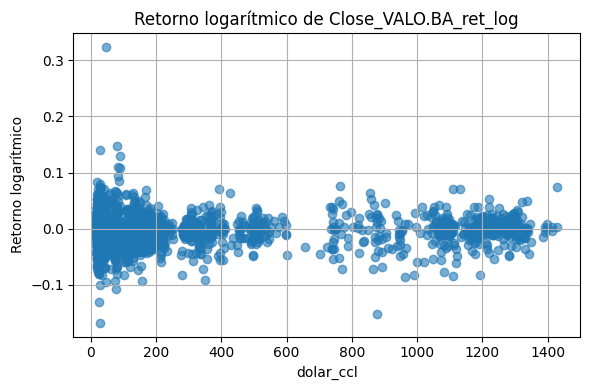

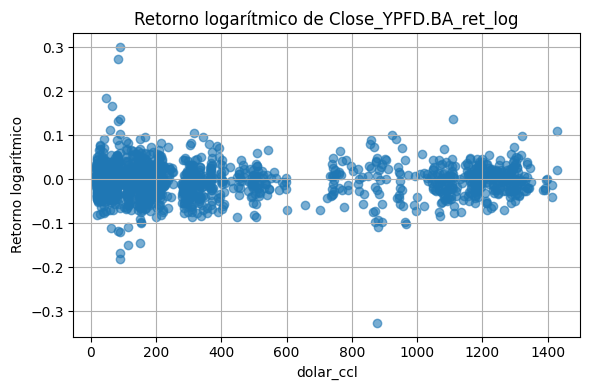

In [79]:
# Armo scatter plot contra ccl

dolar_col = 'dolar_ccl'

for acc in ret_log_cols:

    plt.figure(figsize=(6, 4))
    plt.scatter(df_con_dolar_completo[dolar_col],df_con_dolar_completo[acc], alpha=0.6)
    plt.title(f'Retorno logarítmico de {acc}' )
    plt.xlabel(dolar_col)
    plt.ylabel('Retorno logarítmico')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [80]:
df_con_dolar_completo[ret_log_cols]

Close_ALUA.BA_ret_log  Close_BBAR.BA_ret_log  Close_BMA.BA_ret_log  \
0                       NaN                    NaN                   NaN   
1                  0.007595               0.055166              0.027059   
2                  0.027365               0.099411              0.088308   
3                  0.060697               0.022757              0.025636   
4                  0.017173              -0.006270             -0.014497   
...                     ...                    ...                   ...   
1803               0.029366               0.002843              0.002115   
1804              -0.032683              -0.007735             -0.002821   
1805              -0.037229               0.017420             -0.013509   
1806              -0.017392              -0.003621              0.001192   
1807               0.003503               0.015597              0.017950   

      Close_BYMA.BA_ret_log  Close_CEPU.BA_ret_log  Close_COME.BA_ret_log  \
0                       NaN                    NaN                    NaN   
1                 -0.001168               0.034159               0.043268   
2                  0.015073               0.085767               0.105035   
3                  0.015982               0.016978               0.063897   
4                  0.011261              -0.020409              -0.011065   
...                     ...                    ...                    ...   
1803               0.023430              -0.038840               0.028342   
1804               0.020834               0.006579              -0.001998   
1805               0.013923              -0.014864               0.025667   
1806               0.012528               0.008285              -0.013739   
1807              -0.012122              -0.003306              -0.028058   

      Close_CRES.BA_ret_log  Close_EDN.BA_ret_log  Close_GGAL.BA_ret_log  \
0                       NaN                   NaN                    NaN   
1                  0.039933              0.034289               0.044452   
2                  0.055377              0.091216               0.093332   
3                 -0.006757              0.040206               0.025141   
4                 -0.013652             -0.009901              -0.012491   
...                     ...                   ...                    ...   
1803               0.008690              0.010403              -0.019038   
1804               0.026831              0.010296               0.008506   
1805              -0.023129              0.015248              -0.013323   
1806              -0.013639             -0.016529               0.002144   
1807              -0.020177              0.001281               0.022758   

      Close_IRSA.BA_ret_log  ...  Close_METR.BA_ret_log  \
0                       NaN  ...                    NaN   
1                  0.049090  ...               0.109620   
2                  0.026589  ...               0.091328   
3                  0.011594  ...               0.043909   
4                 -0.020379  ...               0.004762   
...                     ...  ...                    ...   
1803              -0.001903  ...               0.006079   
1804               0.025389  ...              -0.015267   
1805              -0.011205  ...              -0.015504   
1806              -0.010382  ...               0.013965   
1807              -0.021094  ...               0.024354   

      Close_PAMP.BA_ret_log  Close_SUPV.BA_ret_log  Close_TECO2.BA_ret_log  \
0                       NaN                    NaN                     NaN   
1                  0.041847               0.027540                0.011651   
2                  0.073718               0.112297                0.056300   
3                  0.050722               0.041611               -0.001826   
4                 -0.024421               0.000000               -0.024053   
...                     ...                    ...                     ...   


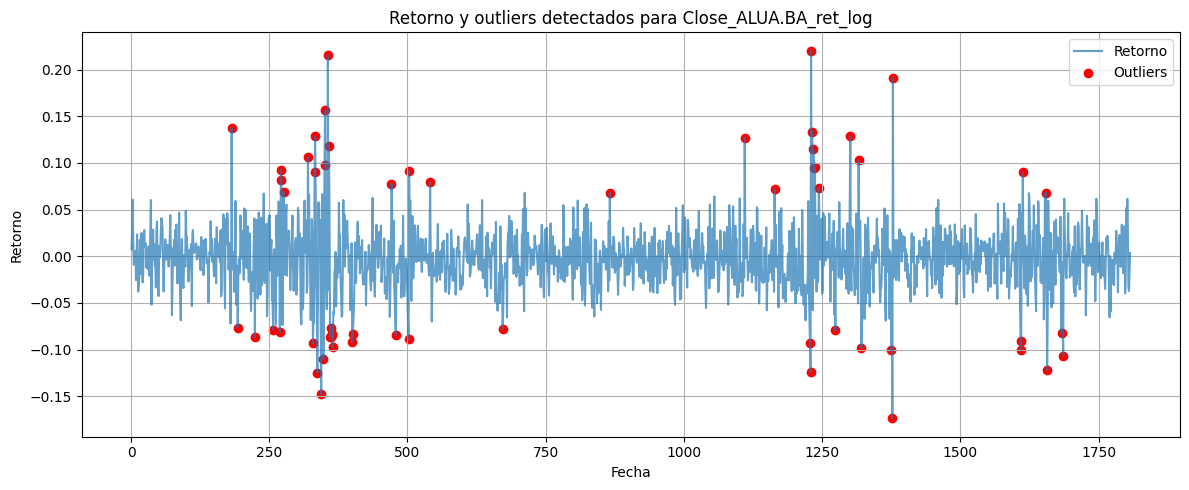

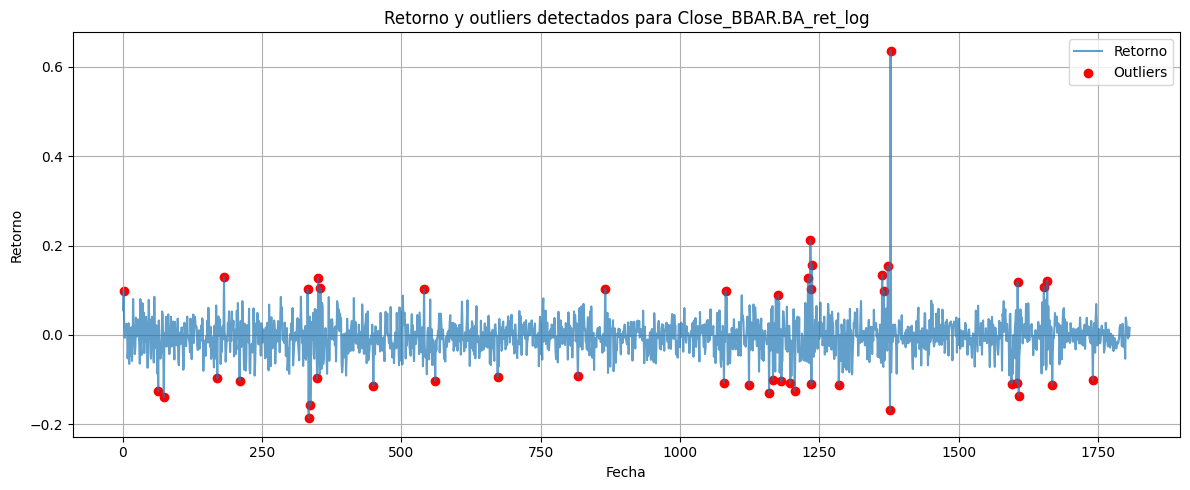

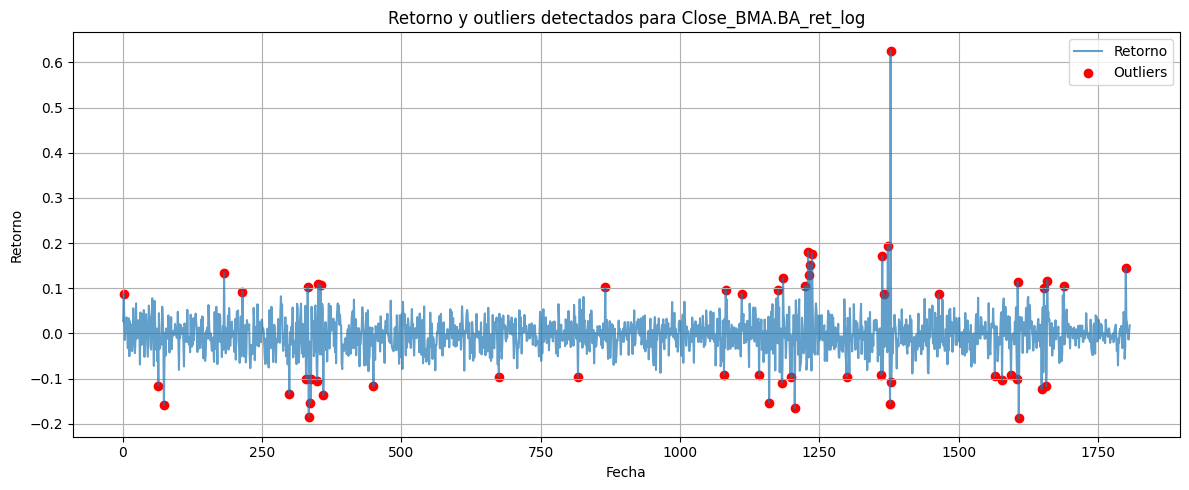

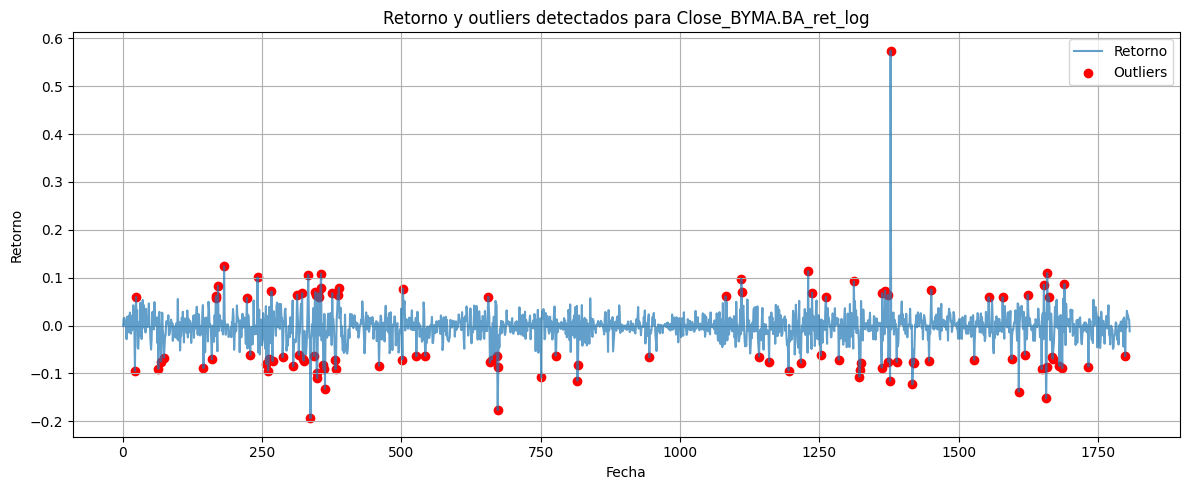

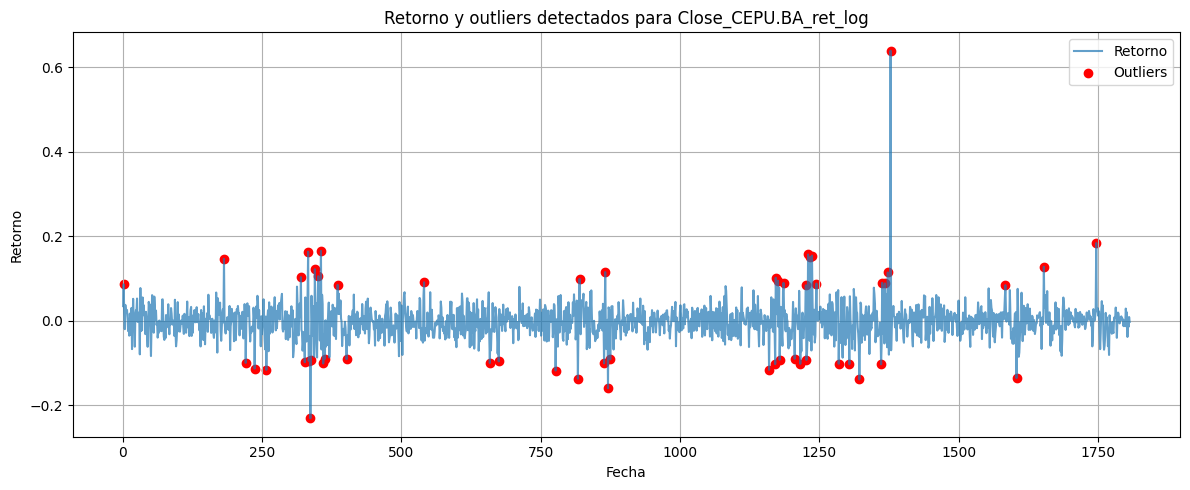

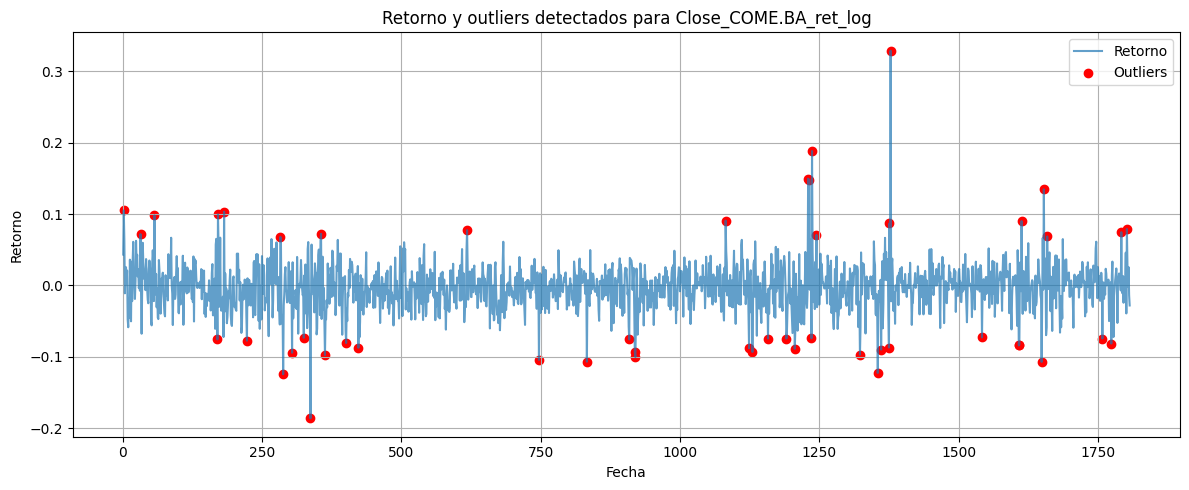

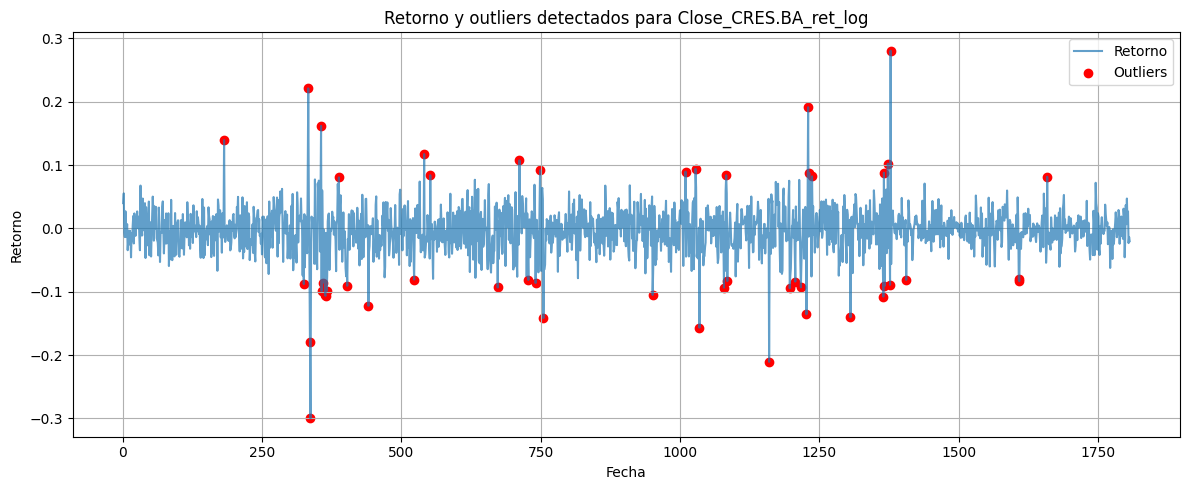

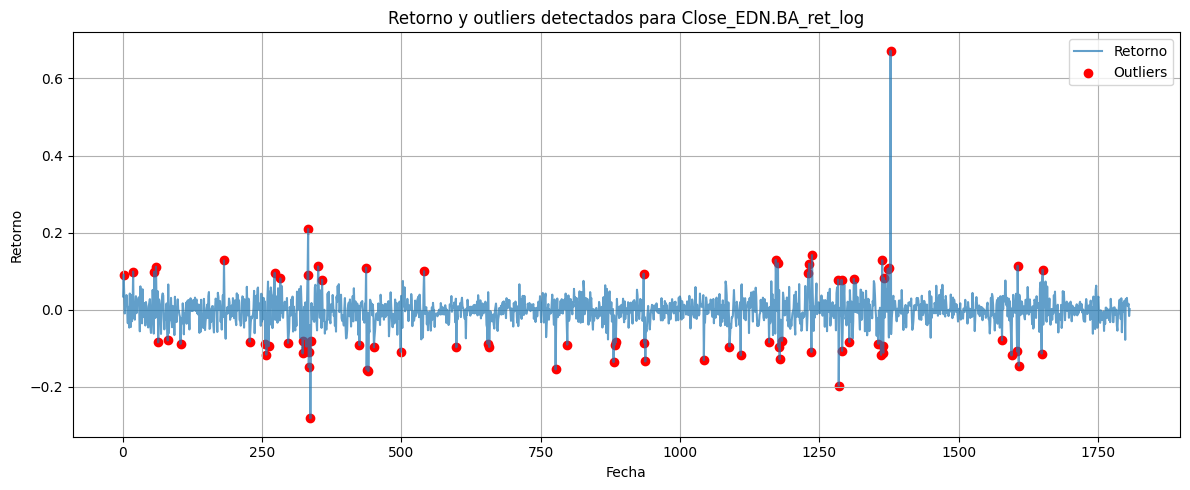

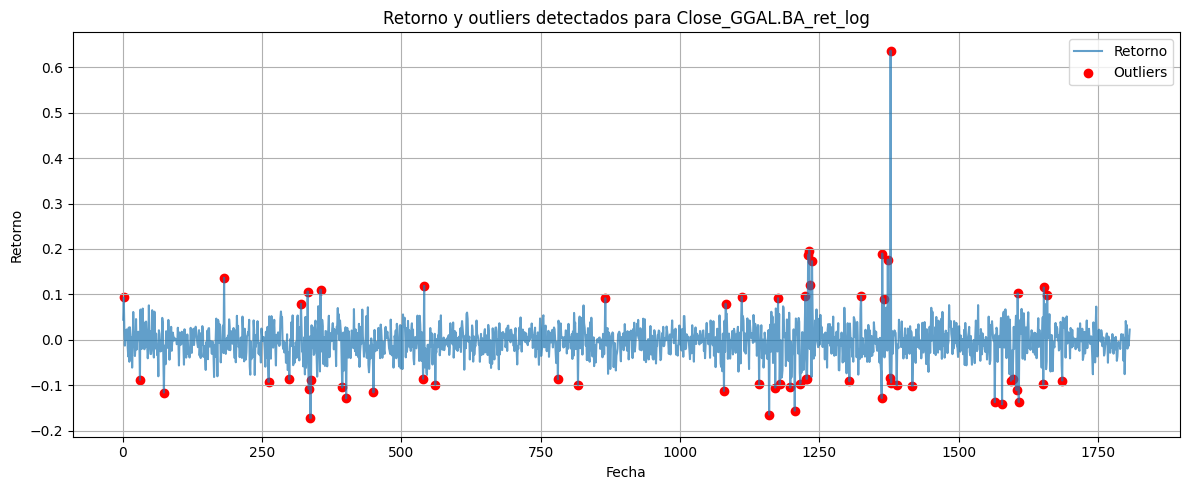

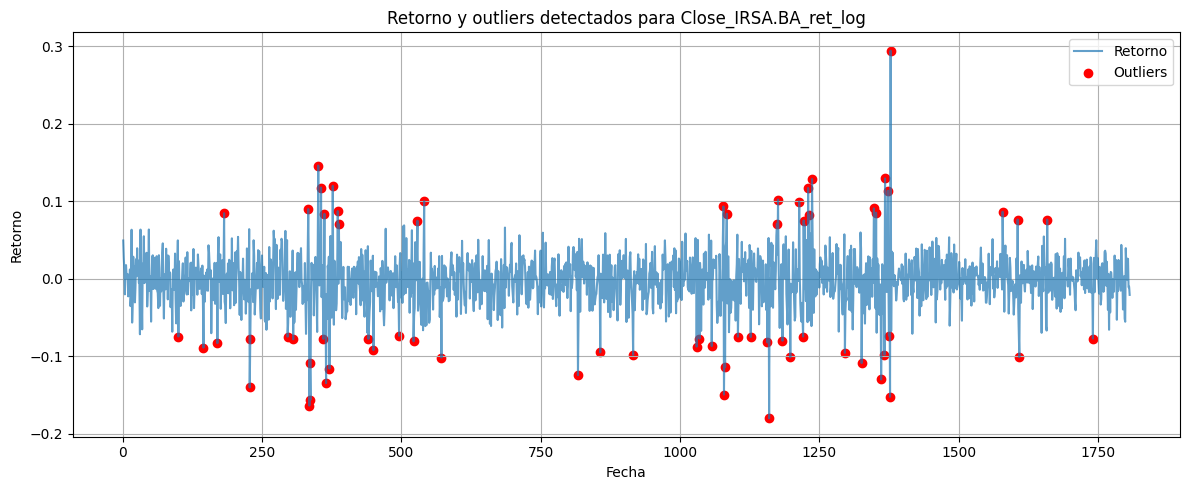

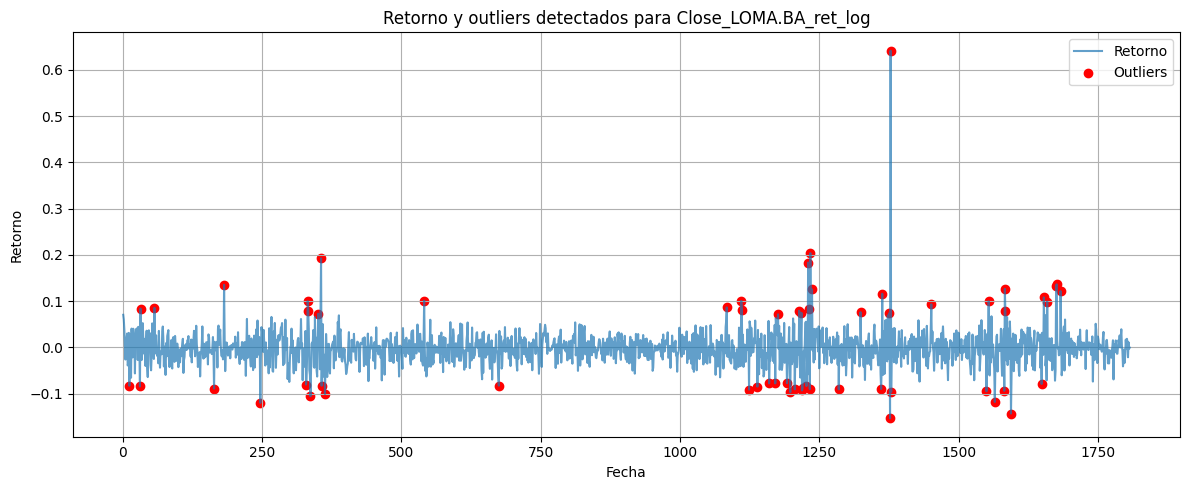

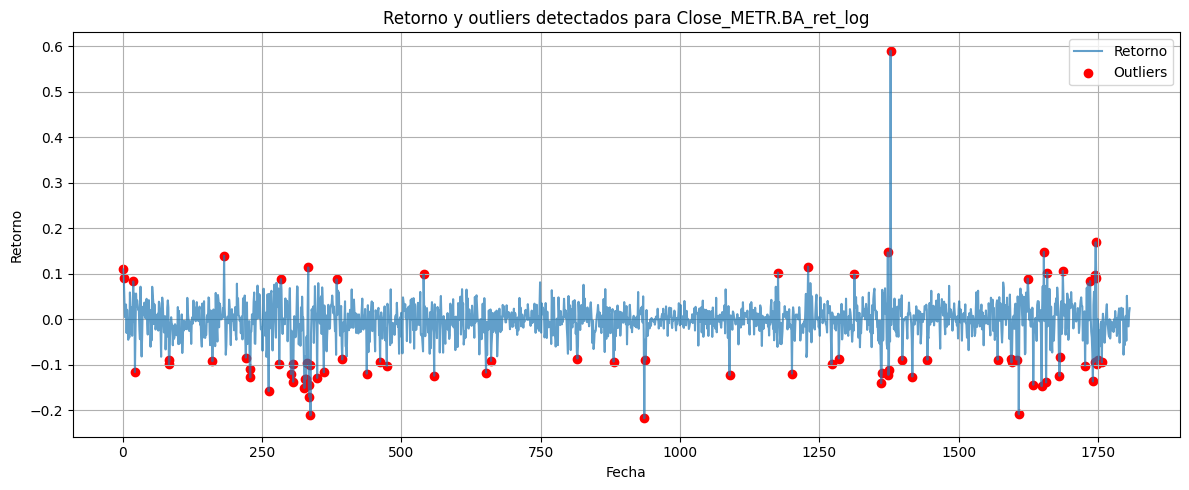

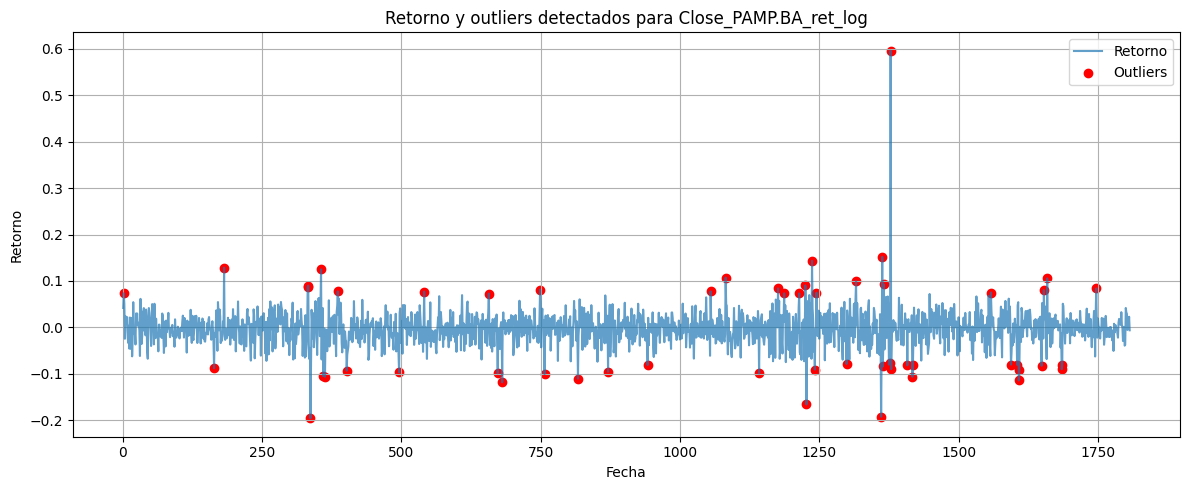

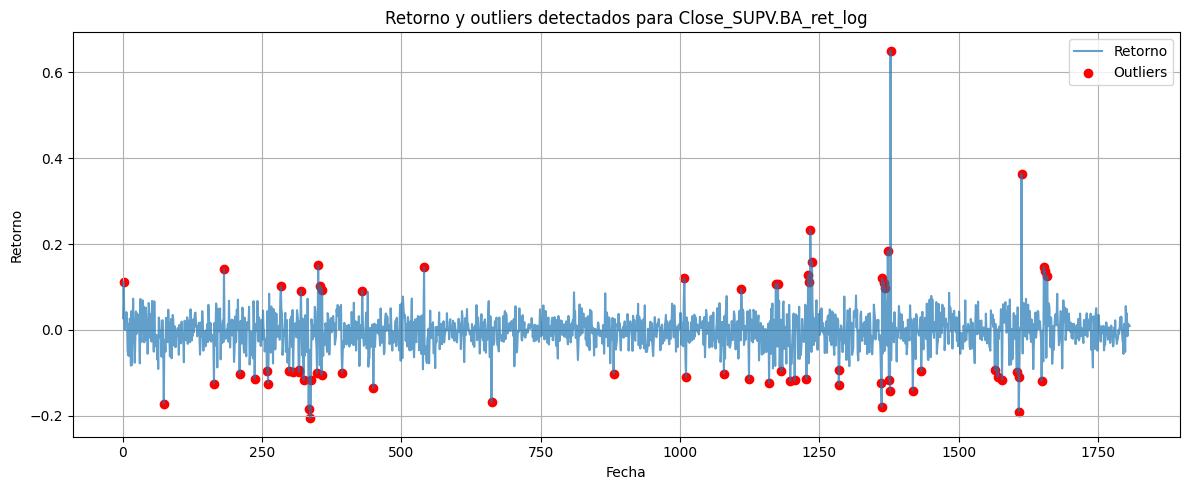

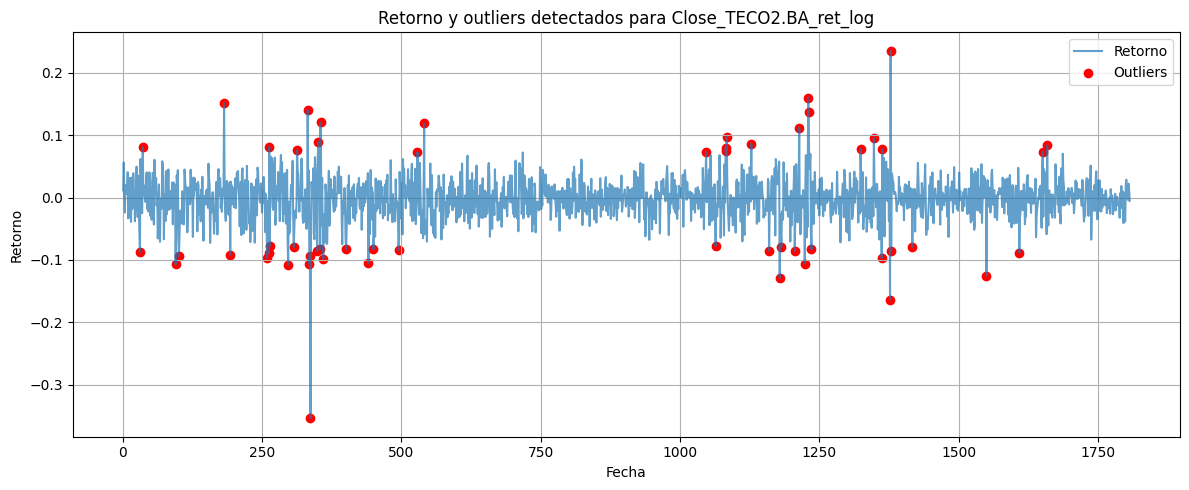

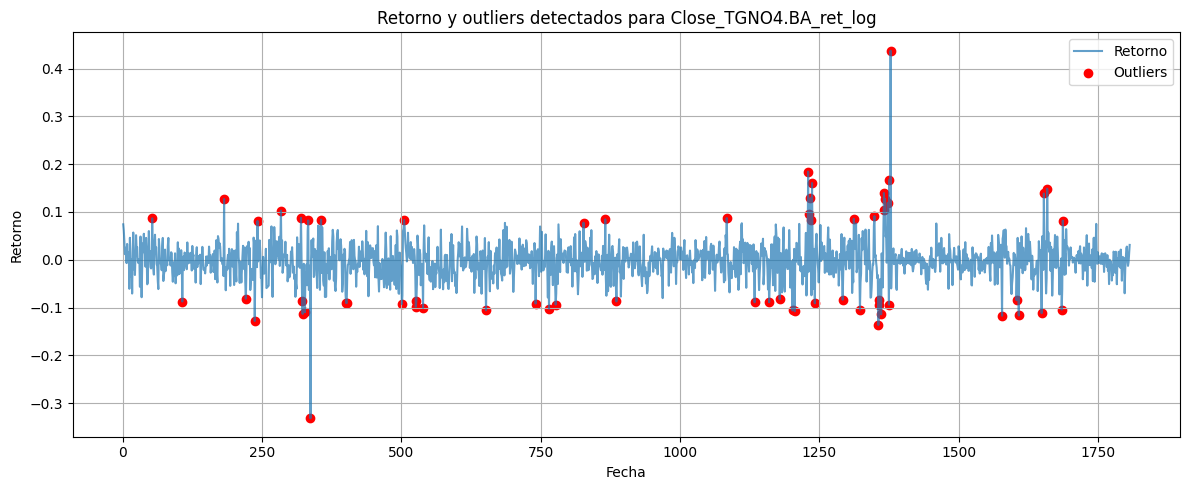

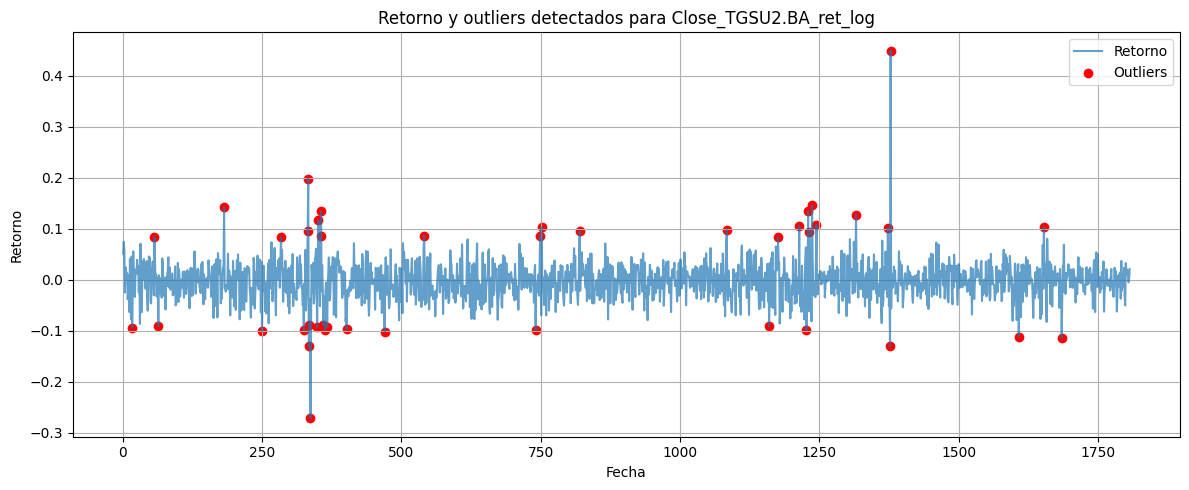

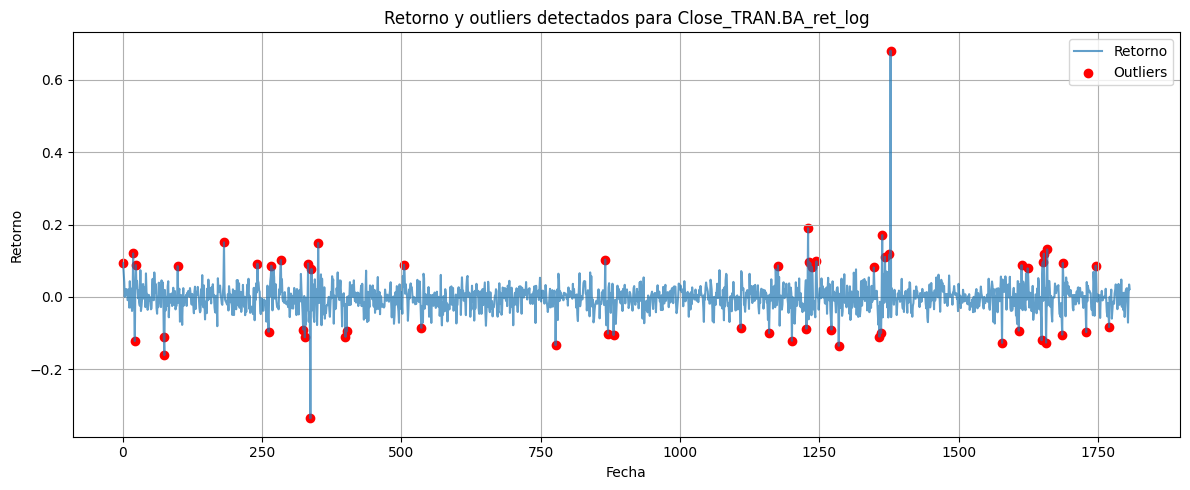

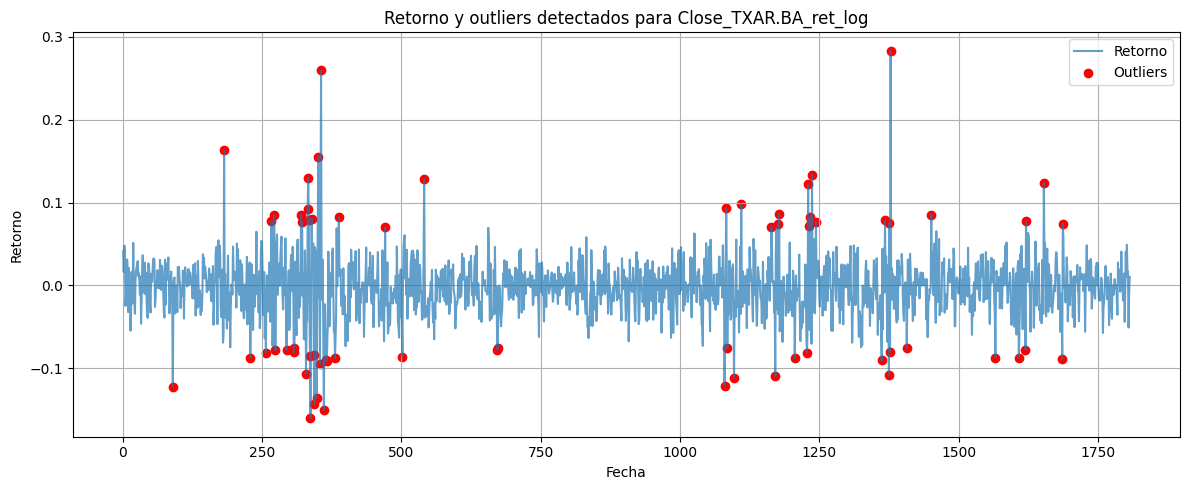

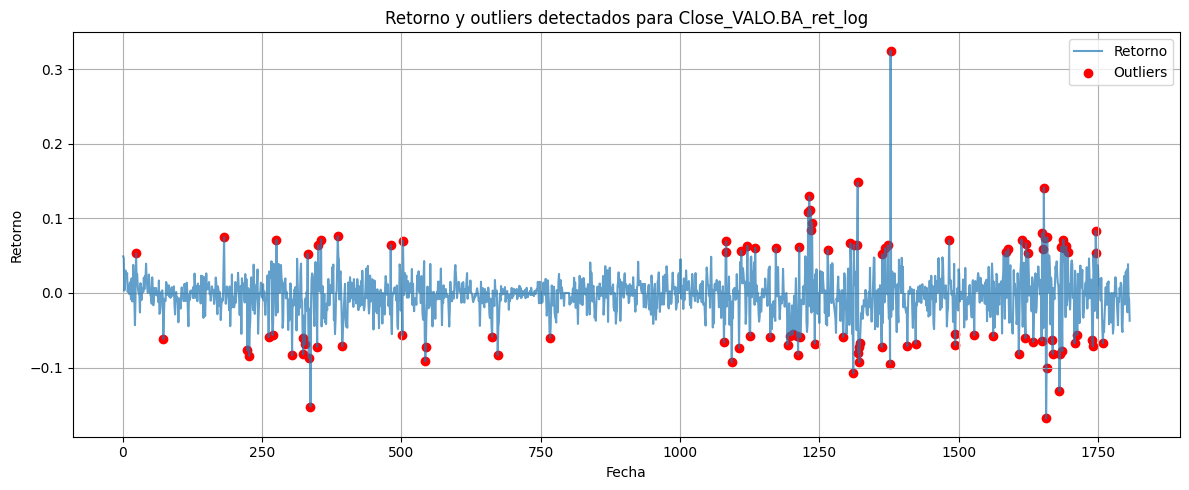

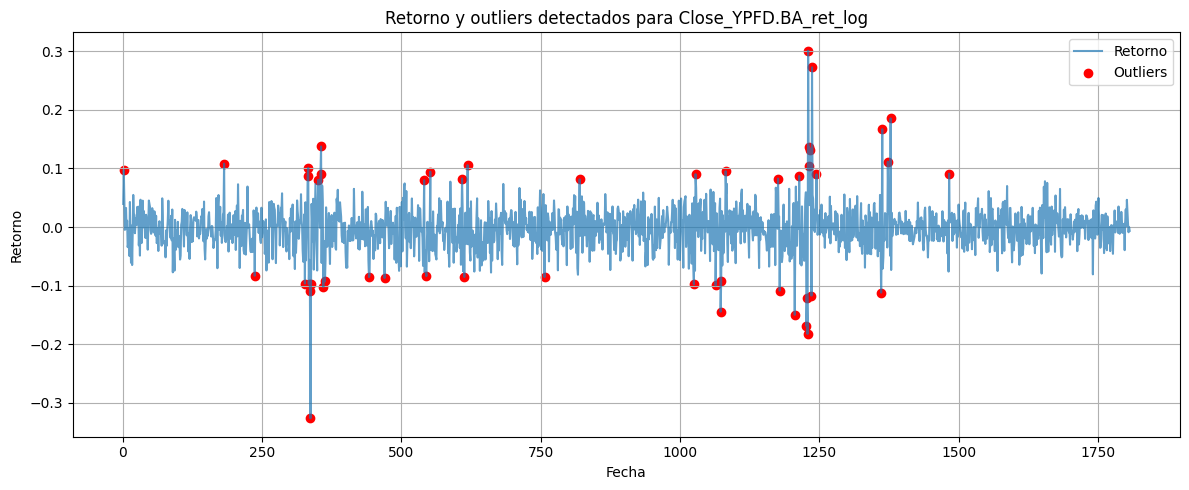

In [81]:
# armo diagrama para ver evolcion de retornos y sus outliers

def plot_outliers_por_columna(df):
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower) | (df[col] > upper)]

        plt.figure(figsize=(12, 5))
        plt.plot(df[col], label='Retorno', alpha=0.7)
        plt.scatter(outliers.index, outliers[col], color='red', label='Outliers')
        plt.title(f'Retorno y outliers detectados para {col}')
        plt.xlabel('Fecha')
        plt.ylabel('Retorno')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

plot_outliers_por_columna(df_con_dolar_completo[ret_log_cols])



In [82]:


def guardar_bloques_outliers(df, columnas, nombre_archivo):
    filas = len(columnas)
    fig, axs = plt.subplots(filas, 1, figsize=(12, 4 * filas), sharex=True)


    if filas == 1:
        axs = [axs]

    for i, col in enumerate(columnas):
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower) | (df[col] > upper)]

        axs[i].plot(df["Date"], df[col], label='Retorno', alpha=0.7)
        axs[i].scatter(outliers["Date"], outliers[col], color='red', label='Outliers')
        axs[i].set_title(f'{col}')
        axs[i].set_ylabel('Retorno')
        axs[i].grid(True)
        axs[i].legend()

    axs[-1].set_xlabel('Date')
    plt.tight_layout()
    plt.savefig(nombre_archivo)
    plt.close()


In [83]:
#divido en 3 bloques para poder insertar en el documento entregable
n = len(ret_log_cols)
bloque_1 = ret_log_cols[:n//3]
bloque_2 = ret_log_cols[n//3:2*n//3]
bloque_3 = ret_log_cols[2*n//3:]

guardar_bloques_outliers(df_con_dolar_completo, bloque_1, "bloque_1.png")
guardar_bloques_outliers(df_con_dolar_completo, bloque_2, "bloque_2.png")
guardar_bloques_outliers(df_con_dolar_completo, bloque_3, "bloque_3.png")


In [84]:
columnas_seleccionadas= ret_log_cols + ['Date']


def guardar_outliers_por_columna(df):
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower) | (df[col] > upper)]

        plt.figure(figsize=(12, 5))
        plt.plot(df["Date"], df[col], label='Retorno', alpha=0.7)
        plt.scatter(outliers["Date"], outliers[col], color='red', label='Outliers')
        plt.title(f'Retorno y outliers detectados para {col}')
        plt.xlabel('Fecha')
        plt.ylabel('Retorno')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()

        # Guardar el gráfico
        plt.savefig(f"outliers_{col}.png")
        plt.close()

guardar_outliers_por_columna(df_con_dolar_completo[columnas_seleccionadas])



In [85]:
# armo una salida intermedia
df_con_dolar_completo[columnas_seleccionadas].to_excel('salida_outliers.xlsx', index=False)

Aca se trabaja con dolar promedio


In [87]:
# calculo dolar promedio
df_con_dolar_completo['dolar_paralelo_promedio'] = (df_con_dolar_completo['dolar_blue'] + df_con_dolar_completo['dolar_ccl']+ df_con_dolar_completo['dolar_oficial']) / 3

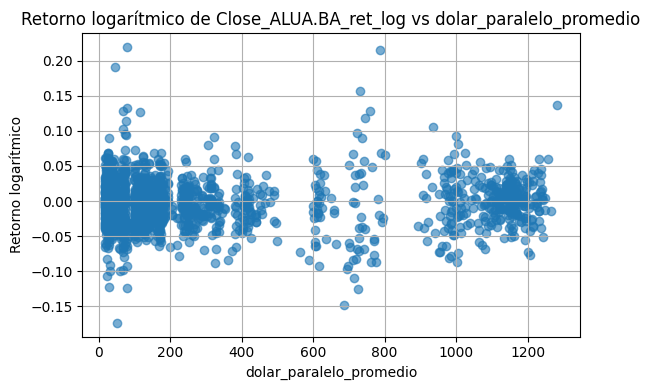

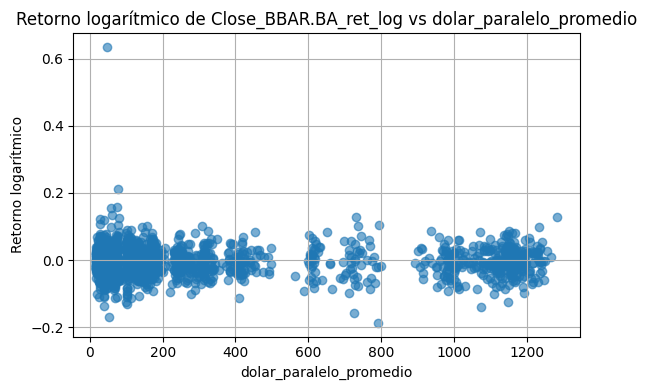

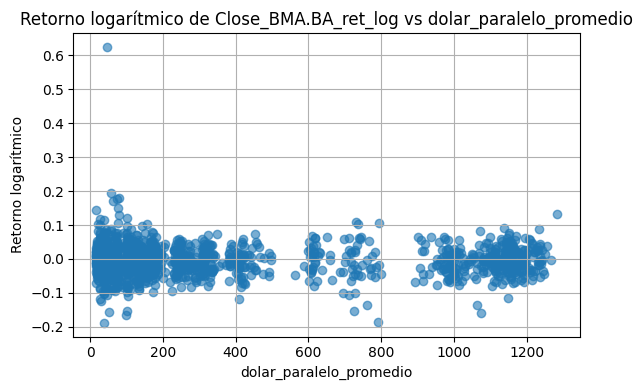

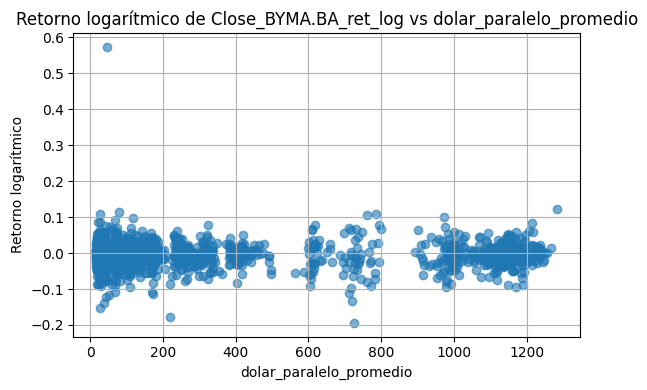

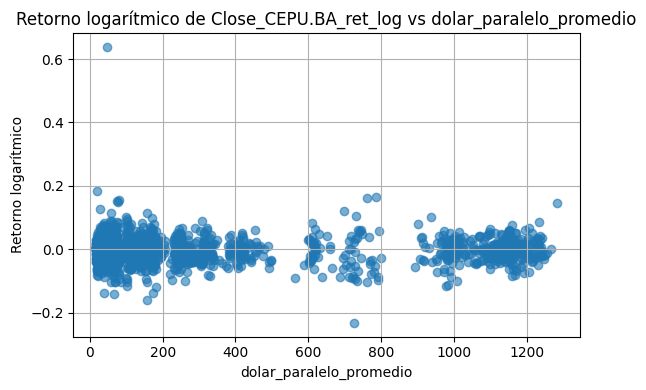

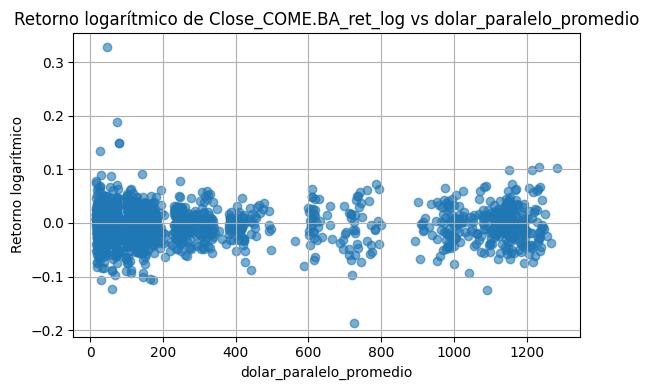

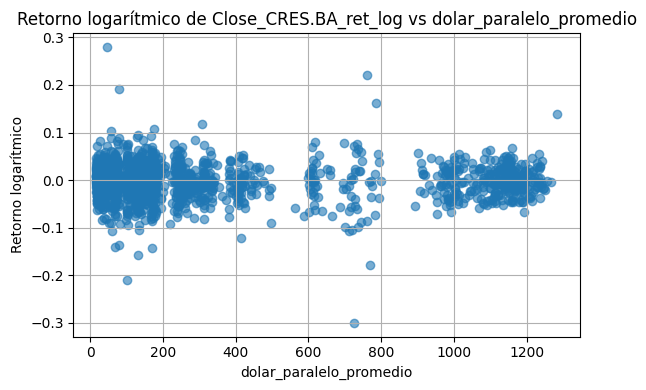

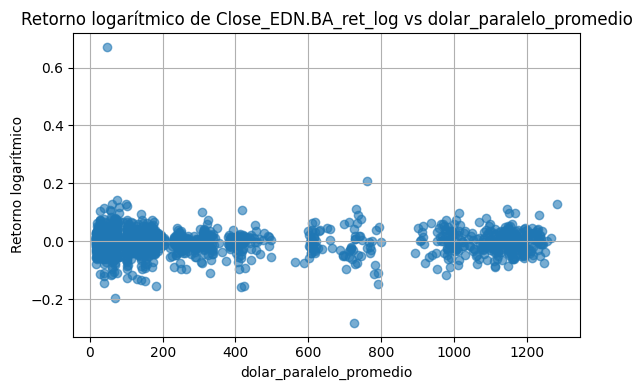

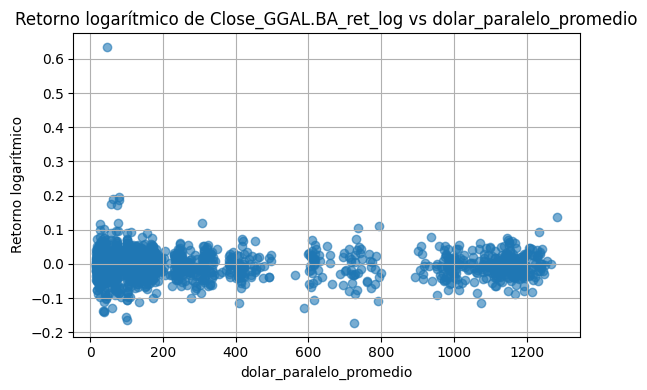

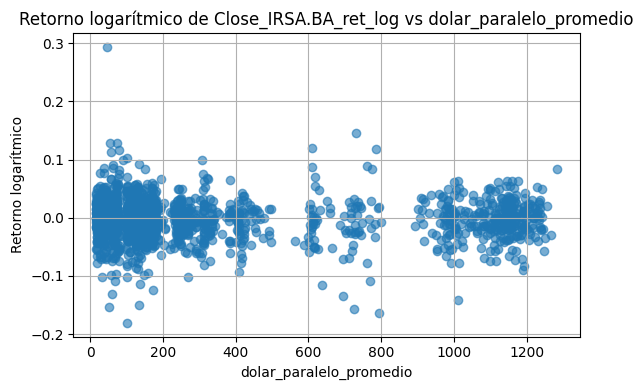

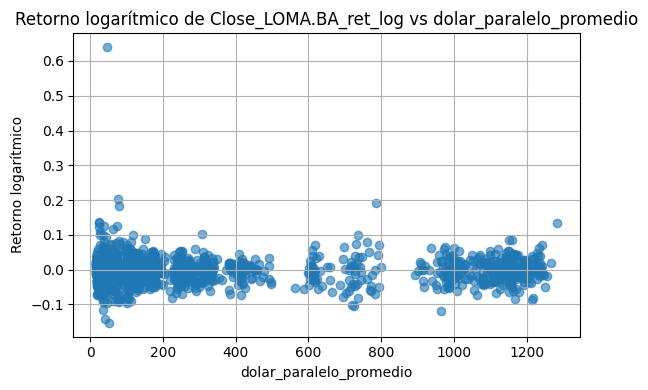

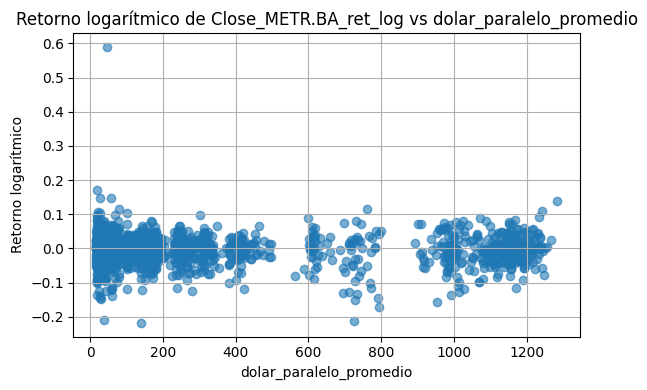

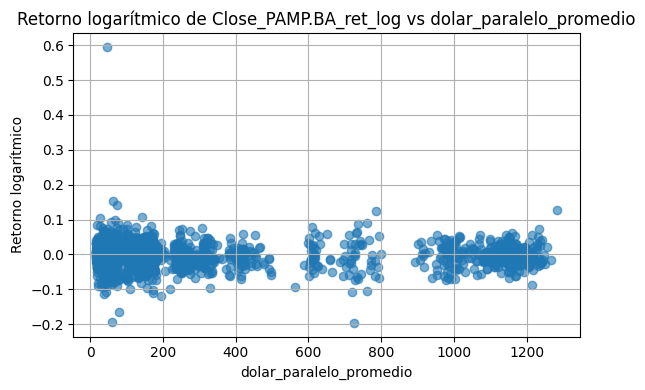

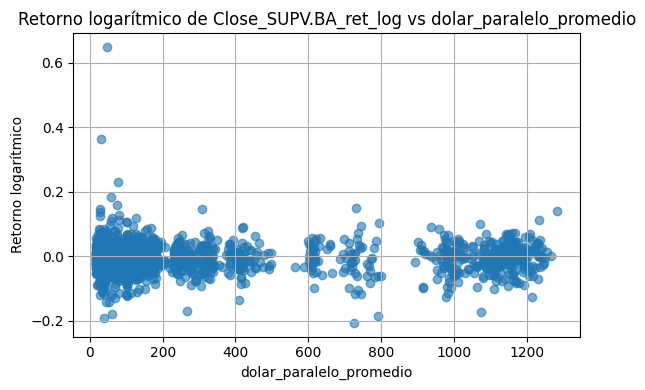

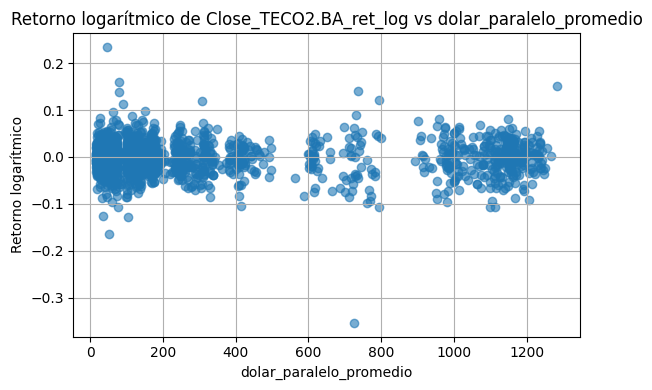

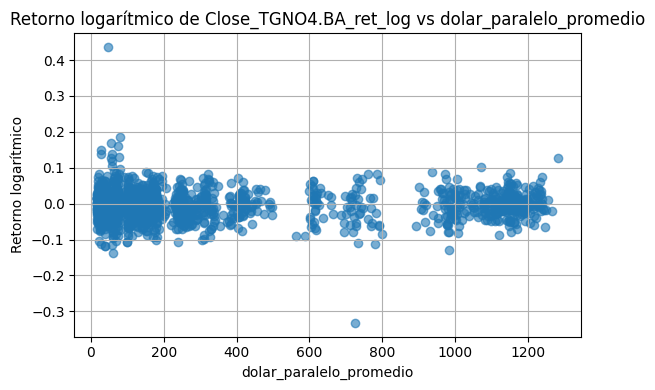

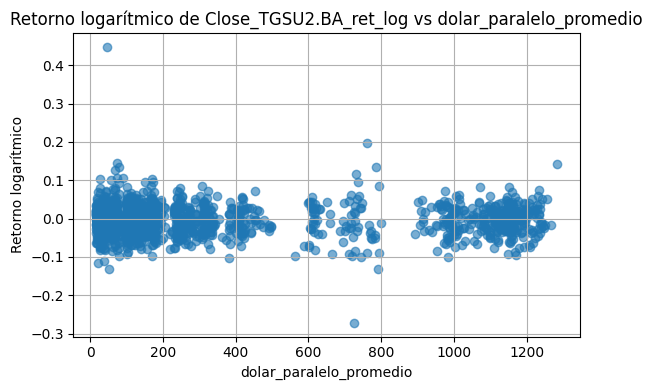

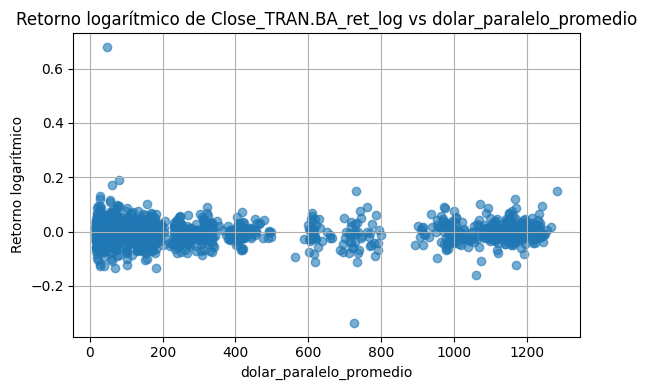

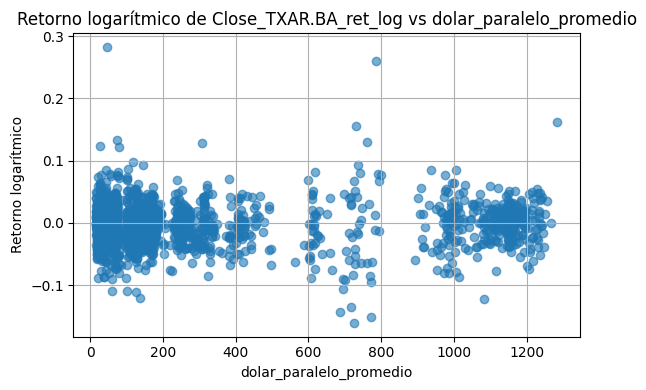

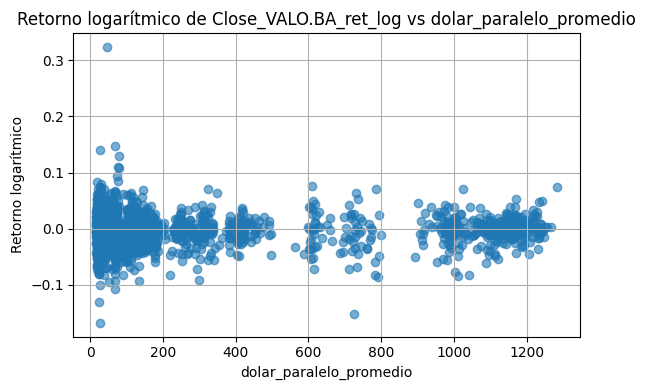

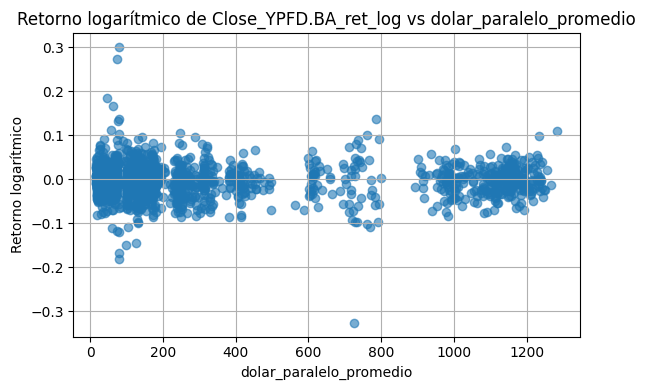

In [88]:
dolar_col = 'dolar_paralelo_promedio'

# Recalculo diagrama
for acc in ret_log_cols:

    plt.figure(figsize=(6, 4))
    plt.scatter(df_con_dolar_completo[dolar_col],df_con_dolar_completo[acc], alpha=0.6)
    plt.title(f'Retorno logarítmico de {acc} vs {dolar_col}')
    plt.xlabel(dolar_col)
    plt.ylabel('Retorno logarítmico')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

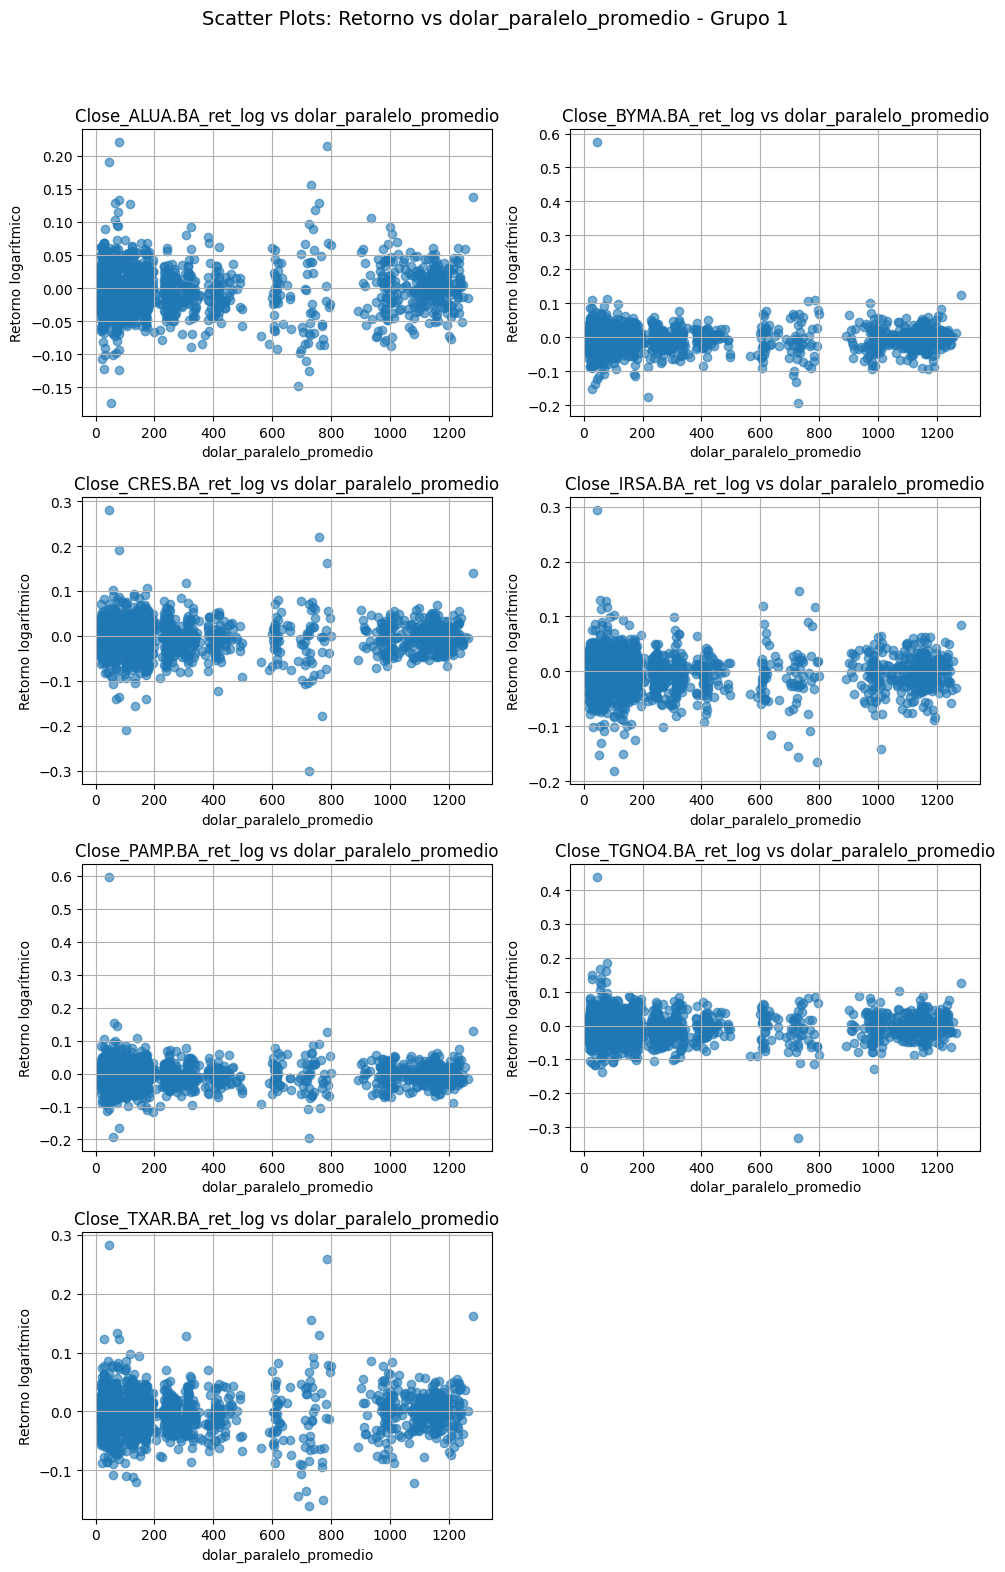

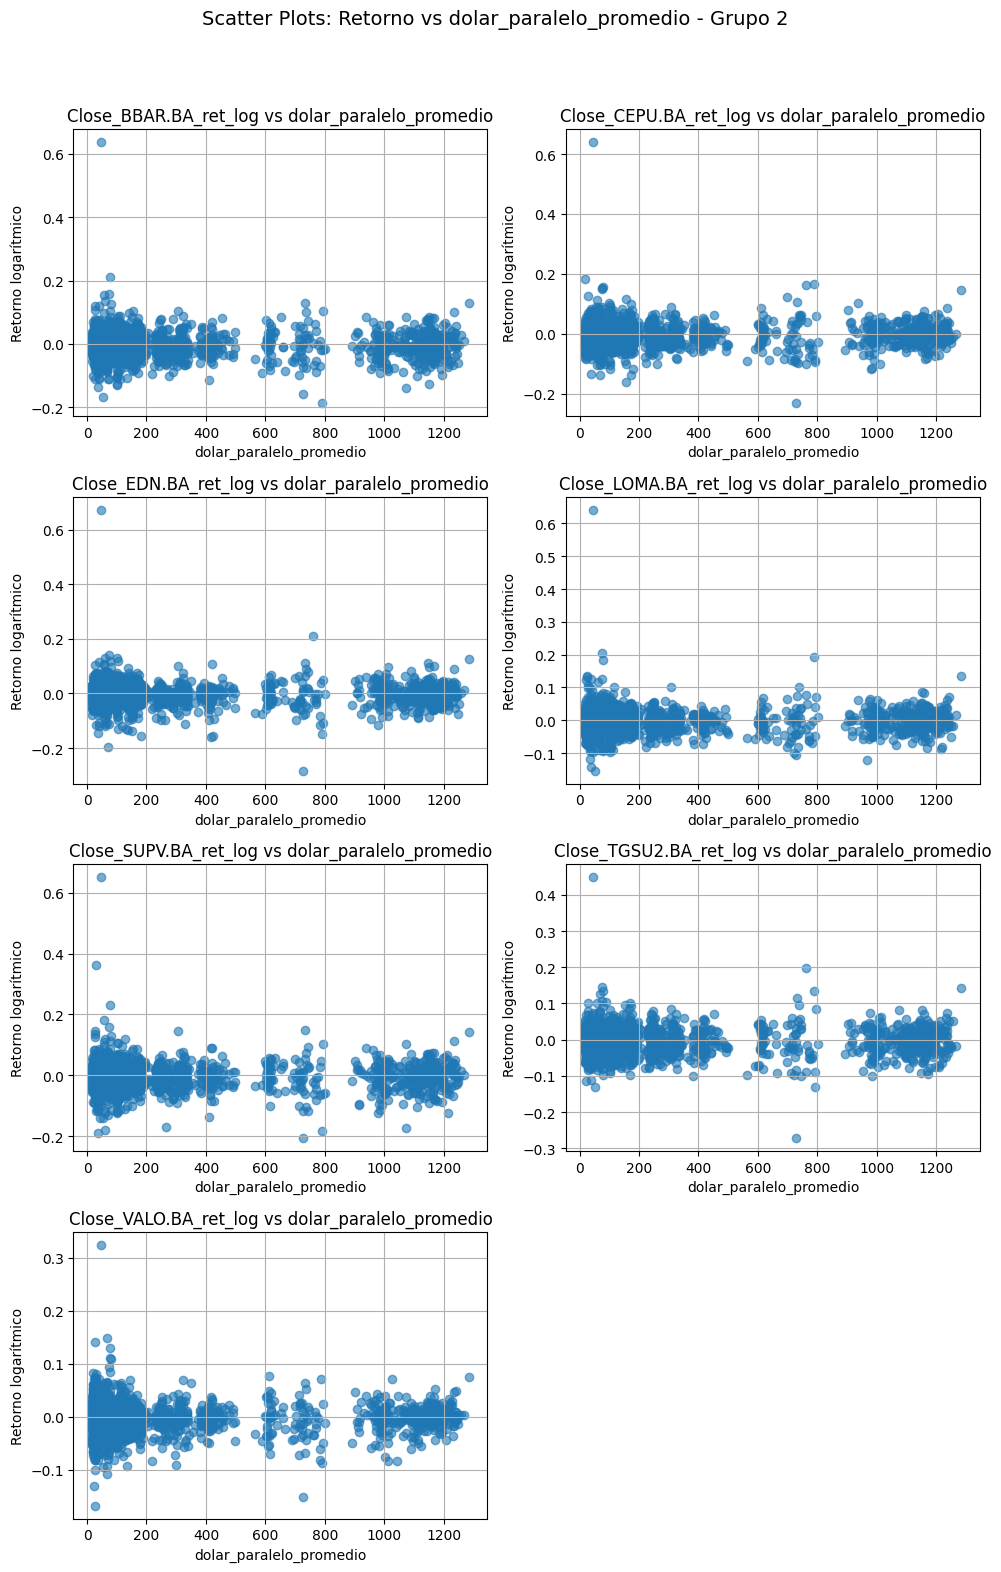

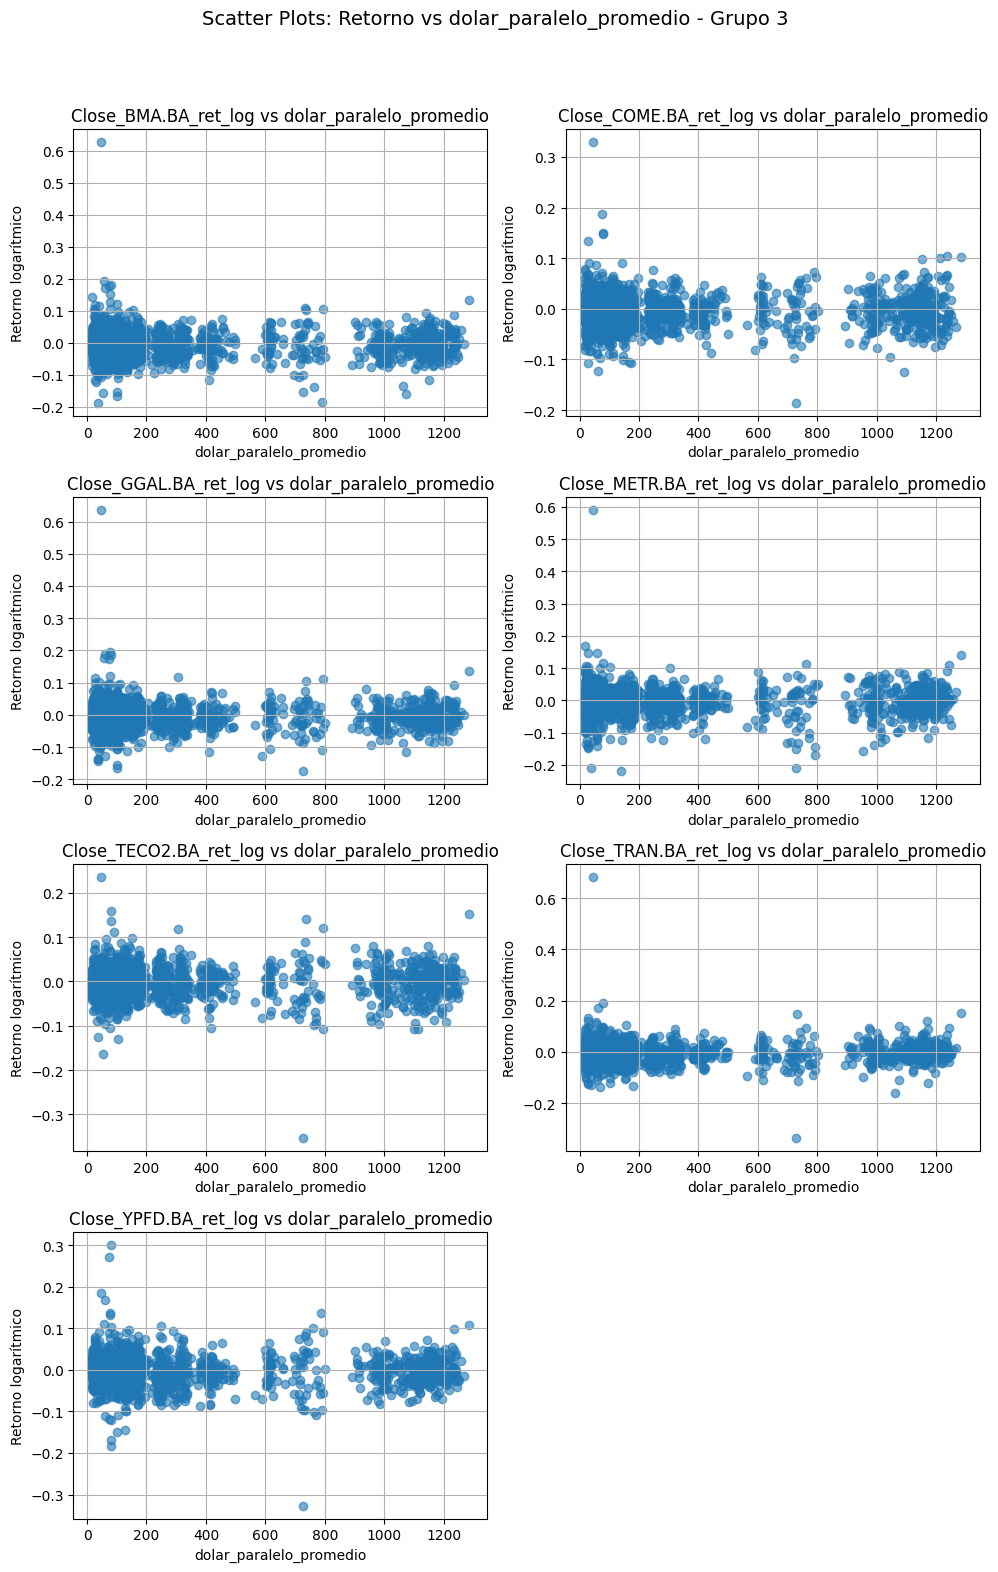

In [89]:


dolar_col = 'dolar_paralelo_promedio'


chunks = [ret_log_cols[i::3] for i in range(3)]

for idx, grupo in enumerate(chunks, start=1):
    n = len(grupo)
    ncols = 2
    nrows = -(-n // ncols)

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 4 * nrows))
    axes = axes.flatten()

    for i, acc in enumerate(grupo):
        axes[i].scatter(df_con_dolar_completo[dolar_col], df_con_dolar_completo[acc], alpha=0.6)
        axes[i].set_title(f'{acc} vs {dolar_col}')
        axes[i].set_xlabel(dolar_col)
        axes[i].set_ylabel('Retorno logarítmico')
        axes[i].grid(True)


    for j in range(len(grupo), len(axes)):
        fig.delaxes(axes[j])

    fig.suptitle(f'Scatter Plots: Retorno vs {dolar_col} - Grupo {idx}', fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    fig.savefig(f'scatter_retornos_grupo_{idx}.png', dpi=300)
    plt.show()


In [90]:
# divido cada accion por dolar promedio
col_divisor = 'dolar_paralelo_promedio'
activos_a_dolarizar = [col for col in df_con_dolar_completo.columns if 'close' in col.lower() and 'ret_log'  not in col ]

for col in activos_a_dolarizar:
    nuevo_nombre = f'{col}_usd'
    df_con_dolar_completo[nuevo_nombre] = df_con_dolar_completo[col] / df_con_dolar_completo[col_divisor]


In [91]:
df_con_dolar_completo.head()

Date  Close_ALUA.BA  High_ALUA.BA  Low_ALUA.BA  Open_ALUA.BA  \
0 2025-04-07          787.0         793.0        741.0         782.0   
1 2025-04-04          793.0         799.0        733.0         798.0   
2 2025-04-03          815.0         865.0        804.0         845.0   
3 2025-04-01          866.0         885.0        851.0         881.0   
4 2025-03-31          881.0         885.0        845.0         860.0   

   Volume_ALUA.BA  Close_BBAR.BA  High_BBAR.BA  Low_BBAR.BA  Open_BBAR.BA  \
0          745887         6700.0        7220.0       6600.0        6700.0   
1         1002353         7080.0        7550.0       6770.0        7550.0   
2          757022         7820.0        7920.0       7720.0        7920.0   
3          769946         8000.0        8140.0       7880.0        8000.0   
4          645803         7950.0        8140.0       7820.0        8000.0   

   ...  Close_METR.BA_usd  Close_PAMP.BA_usd  Close_SUPV.BA_usd  \
0  ...           1.301042           2.784548           2.272858   
1  ...           1.474647           2.949294           2.373134   
2  ...           1.623393           3.190108           2.667870   
3  ...           1.699815           3.363118           2.787047   
4  ...           1.698341           3.263557           2.771402   

   Close_TECO2.BA_usd  Close_TGNO4.BA_usd  Close_TGSU2.BA_usd  \
0            2.030895            2.268891            4.704379   
1            2.087069            2.481919            5.028304   
2            2.218502            2.651676            5.440997   
3            2.219090            2.762706            5.785050   
4            2.154190            2.779470            5.607348   

   Close_TRAN.BA_usd  Close_TXAR.BA_usd  Close_VALO.BA_usd  Close_YPFD.BA_usd  
0           1.340708           0.563256           0.220939          30.622094  
1           1.494792           0.596305           0.235702          32.353593  
2           1.603151           0.608873           0.248165          35.827994  
3           1.675474           0.640169           0.249495          37.627165  
4           1.666068           0.661586           0.250112          37.234407  

[5 rows x 152 columns]

In [92]:
# Recalculo salida
acciones_usd_cols = [col for col in df_con_dolar_completo.columns if 'usd' in col.lower()]
for col in acciones_usd_cols:
    df_con_dolar_completo[f'{col}_ret_usd'] = np.log(df_con_dolar_completo[col] /df_con_dolar_completo[col].shift(1))

df_acciones_dolarizadas=df_con_dolar_completo

df_acciones_dolarizadas.to_excel('salida_acciones_dolarizadas.xlsx', index=False)

In [114]:
# Recalculo correlaciones sobre acciones dolarizadas

acciones_close = [col for col in df_con_dolar_completo.columns if 'ret' not in col.lower() and '_usd' in col.lower() ]
cols_interes = acciones_close
df_corr = df_con_dolar_completo[cols_interes]
df_corr = df_corr.dropna()
matriz_correlacion = df_corr.corr()
correlaciones = matriz_correlacion.loc[acciones_close]

In [115]:
matriz_correlacion

Close_ALUA.BA_usd  Close_BBAR.BA_usd  Close_BMA.BA_usd  \
Close_ALUA.BA_usd            1.000000           0.330214          0.338122   
Close_BBAR.BA_usd            0.330214           1.000000          0.977760   
Close_BMA.BA_usd             0.338122           0.977760          1.000000   
Close_BYMA.BA_usd            0.564761           0.910262          0.894421   
Close_CEPU.BA_usd            0.534894           0.902963          0.885279   
Close_COME.BA_usd            0.637154           0.696926          0.732957   
Close_CRES.BA_usd            0.504572           0.883301          0.856864   
Close_EDN.BA_usd             0.359703           0.910093          0.876417   
Close_GGAL.BA_usd            0.339820           0.987976          0.986375   
Close_IRSA.BA_usd            0.338466           0.896801          0.873162   
Close_LOMA.BA_usd            0.274762           0.824649          0.786244   
Close_METR.BA_usd            0.342995           0.917003          0.883753   
Close_PAMP.BA_usd            0.713928           0.857223          0.841182   
Close_SUPV.BA_usd            0.208672           0.903431          0.874225   
Close_TECO2.BA_usd          -0.027326           0.697913          0.678957   
Close_TGNO4.BA_usd           0.571640           0.925177          0.933156   
Close_TGSU2.BA_usd           0.643952           0.864804          0.867295   
Close_TRAN.BA_usd            0.492053           0.950054          0.945783   
Close_TXAR.BA_usd            0.931239           0.233747          0.227220   
Close_VALO.BA_usd            0.544659           0.687657          0.695630   
Close_YPFD.BA_usd            0.571848           0.896281          0.905225   

                    Close_BYMA.BA_usd  Close_CEPU.BA_usd  Close_COME.BA_usd  \
Close_ALUA.BA_usd            0.564761           0.534894           0.637154   
Close_BBAR.BA_usd            0.910262           0.902963           0.696926   
Close_BMA.BA_usd             0.894421           0.885279           0.732957   
Close_BYMA.BA_usd            1.000000           0.902814           0.812352   
Close_CEPU.BA_usd            0.902814           1.000000           0.658340   
Close_COME.BA_usd            0.812352           0.658340           1.000000   
Close_CRES.BA_usd            0.880869           0.957494           0.595794   
Close_EDN.BA_usd             0.849398           0.948883           0.529079   
Close_GGAL.BA_usd            0.903694           0.915351           0.695896   
Close_IRSA.BA_usd            0.817084           0.938748           0.519033   
Close_LOMA.BA_usd            0.738025           0.868425           0.410977   
Close_METR.BA_usd            0.860638           0.909900           0.577784   
Close_PAMP.BA_usd            0.928750           0.883802           0.863690   
Close_SUPV.BA_usd            0.794844           0.878465           0.458871   
Close_TECO2.BA_usd           0.498344           0.720821           0.104365   
Close_TGNO4.BA_usd           0.940994           0.940498           0.829859   
Close_TGSU2.BA_usd           0.908913           0.854911           0.878106   
Close_TRAN.BA_usd            0.938493           0.970748           0.730113   
Close_TXAR.BA_usd            0.508518           0.429437           0.611951   
Close_VALO.BA_usd            0.791368           0.655632           0.796984   
Close_YPFD.BA_usd            0.896375           0.848040           0.836091   

                    Close_CRES.BA_usd  Close_EDN.BA_usd  Close_GGAL.BA_usd  \
Close_ALUA.BA_usd            0.504572          0.359703           0.339820   
Close_BBAR.BA_usd            0.883301          0.910093           0.987976   
Close_BMA.BA_usd             0.856864          0.876417           0.986375   
Close_BYMA.BA_usd            0.880869          0.849398           0.903694   
Close_CEPU.BA_usd            0.957494          0.948883           0.915351   
Close_COME.BA_usd            0.595794          0.529079           0.695896   
Close_CRES.BA_usd 

<Axes: >

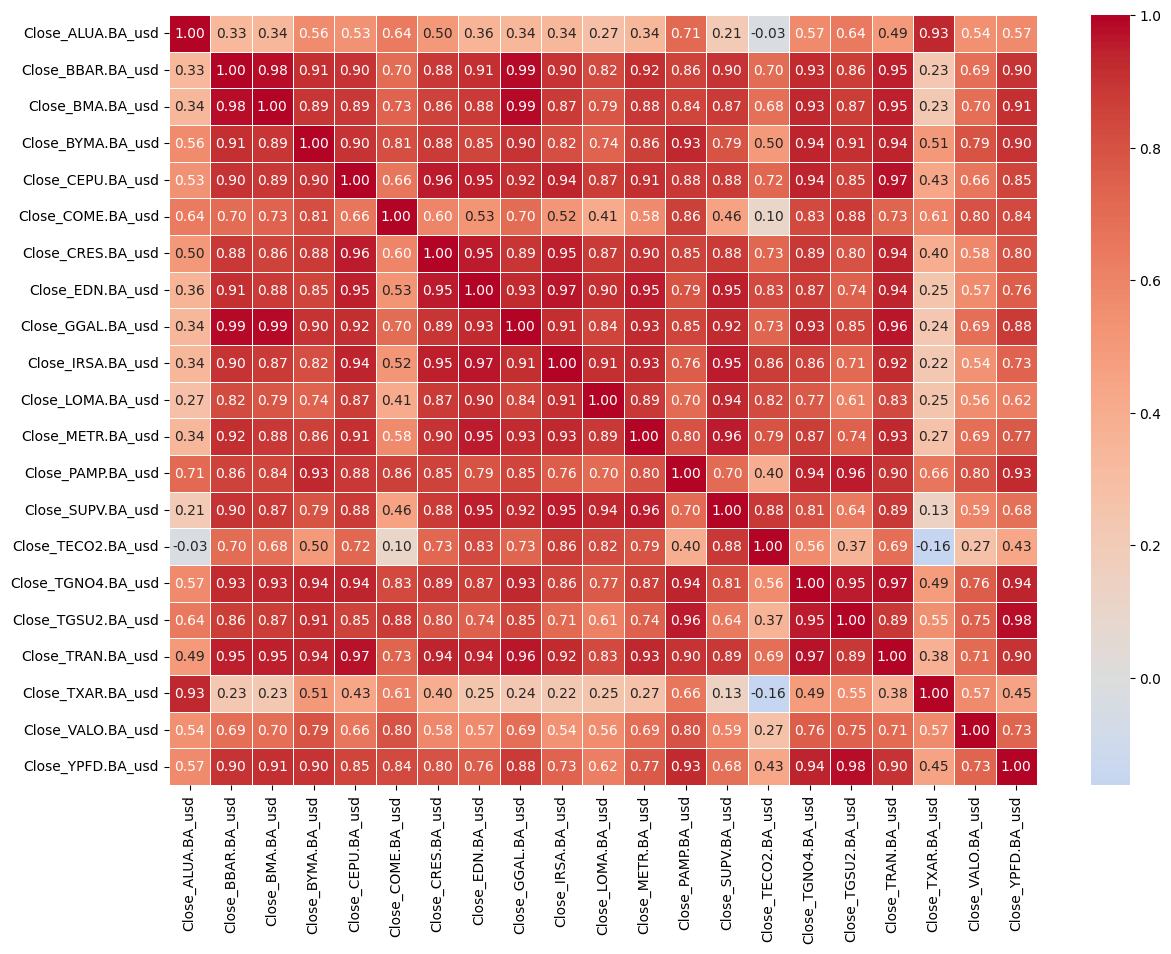

In [116]:
plt.figure(figsize=(14, 10))
sns.heatmap(matriz_correlacion,
            annot=True,
            fmt=".2f",
            cmap="coolwarm",
            center=0,
            linewidths=0.5,
            linecolor='white')

In [117]:
# Dan muy altas todavia, pero paso a analizar las correlaciones sobre los retornos logaritmicos ajustados por el efecto cambiario

acciones_close = [col for col in df_acciones_dolarizadas.columns if '_usd_ret_usd' in col.lower() ]
cols_interes = acciones_close
df_corr = df_acciones_dolarizadas[cols_interes]
df_corr = df_corr.dropna()
matriz_correlacion = df_corr.corr()
correlaciones = matriz_correlacion.loc[acciones_close]

In [118]:
matriz_correlacion

Close_ALUA.BA_usd_ret_usd  \
Close_ALUA.BA_usd_ret_usd                    1.000000   
Close_BBAR.BA_usd_ret_usd                    0.468612   
Close_BMA.BA_usd_ret_usd                     0.482640   
Close_BYMA.BA_usd_ret_usd                    0.519949   
Close_CEPU.BA_usd_ret_usd                    0.526009   
Close_COME.BA_usd_ret_usd                    0.506027   
Close_CRES.BA_usd_ret_usd                    0.467848   
Close_EDN.BA_usd_ret_usd                     0.449156   
Close_GGAL.BA_usd_ret_usd                    0.490243   
Close_IRSA.BA_usd_ret_usd                    0.444576   
Close_LOMA.BA_usd_ret_usd                    0.502868   
Close_METR.BA_usd_ret_usd                    0.452911   
Close_PAMP.BA_usd_ret_usd                    0.487503   
Close_SUPV.BA_usd_ret_usd                    0.479382   
Close_TECO2.BA_usd_ret_usd                   0.428800   
Close_TGNO4.BA_usd_ret_usd                   0.506899   
Close_TGSU2.BA_usd_ret_usd                   0.504631   
Close_TRAN.BA_usd_ret_usd                    0.510088   
Close_TXAR.BA_usd_ret_usd                    0.754164   
Close_VALO.BA_usd_ret_usd                    0.485169   
Close_YPFD.BA_usd_ret_usd                    0.493804   

                            Close_BBAR.BA_usd_ret_usd  \
Close_ALUA.BA_usd_ret_usd                    0.468612   
Close_BBAR.BA_usd_ret_usd                    1.000000   
Close_BMA.BA_usd_ret_usd                     0.880001   
Close_BYMA.BA_usd_ret_usd                    0.649009   
Close_CEPU.BA_usd_ret_usd                    0.752448   
Close_COME.BA_usd_ret_usd                    0.617004   
Close_CRES.BA_usd_ret_usd                    0.611605   
Close_EDN.BA_usd_ret_usd                     0.701634   
Close_GGAL.BA_usd_ret_usd                    0.892873   
Close_IRSA.BA_usd_ret_usd                    0.617500   
Close_LOMA.BA_usd_ret_usd                    0.686321   
Close_METR.BA_usd_ret_usd                    0.633551   
Close_PAMP.BA_usd_ret_usd                    0.761479   
Close_SUPV.BA_usd_ret_usd                    0.843749   
Close_TECO2.BA_usd_ret_usd                   0.626932   
Close_TGNO4.BA_usd_ret_usd                   0.666524   
Close_TGSU2.BA_usd_ret_usd                   0.731095   
Close_TRAN.BA_usd_ret_usd                    0.684898   
Close_TXAR.BA_usd_ret_usd                    0.523558   
Close_VALO.BA_usd_ret_usd                    0.631344   
Close_YPFD.BA_usd_ret_usd                    0.678887   

                            Close_BMA.BA_usd_ret_usd  \
Close_ALUA.BA_usd_ret_usd                   0.482640   
Close_BBAR.BA_usd_ret_usd                   0.880001   
Close_BMA.BA_usd_ret_usd                    1.000000   
Close_BYMA.BA_usd_ret_usd                   0.645266   
Close_CEPU.BA_usd_ret_usd                   0.731183   
Close_COME.BA_usd_ret_usd                   0.619966   
Close_CRES.BA_usd_ret_usd                   0.604476   
Close_EDN.BA_usd_ret_usd                    0.685960   
Close_GGAL.BA_usd_ret_usd                   0.903353   
Close_IRSA.BA_usd_ret_usd                   0.607648   
Close_LOMA.BA_usd_ret_usd                   0.679292   
Close_METR.BA_usd_ret_usd                   0.611179   
Close_PAMP.BA_usd_ret_usd                   0.767893   
Close_SUPV.BA_usd_ret_usd                   0.836474   
Close_TECO2.BA_usd_ret_usd                  0.623766   
Close_TGNO4.BA_usd_ret_usd                  0.649958   
Close_TGSU2.BA_usd_ret_usd                  0.729852   
Close_TRAN.BA_usd_ret_usd                   0.684650   
Close_TXAR.BA_usd_ret_usd                   0.520844   
Close_VALO.BA_usd_ret_usd                   0.635127   
Close_YPFD.BA_usd_ret_usd                   0.693700   

                            Close_BYMA.BA_usd_ret_usd  \
Close_ALUA.BA_usd_ret_usd                    0.519949   
Close_BBAR.BA_usd_ret_usd                    0.649009   
Close_BMA.BA_usd_ret_usd                     0.645266   
Close_BYMA.BA_usd_ret_usd                    1.000000   


<Axes: >

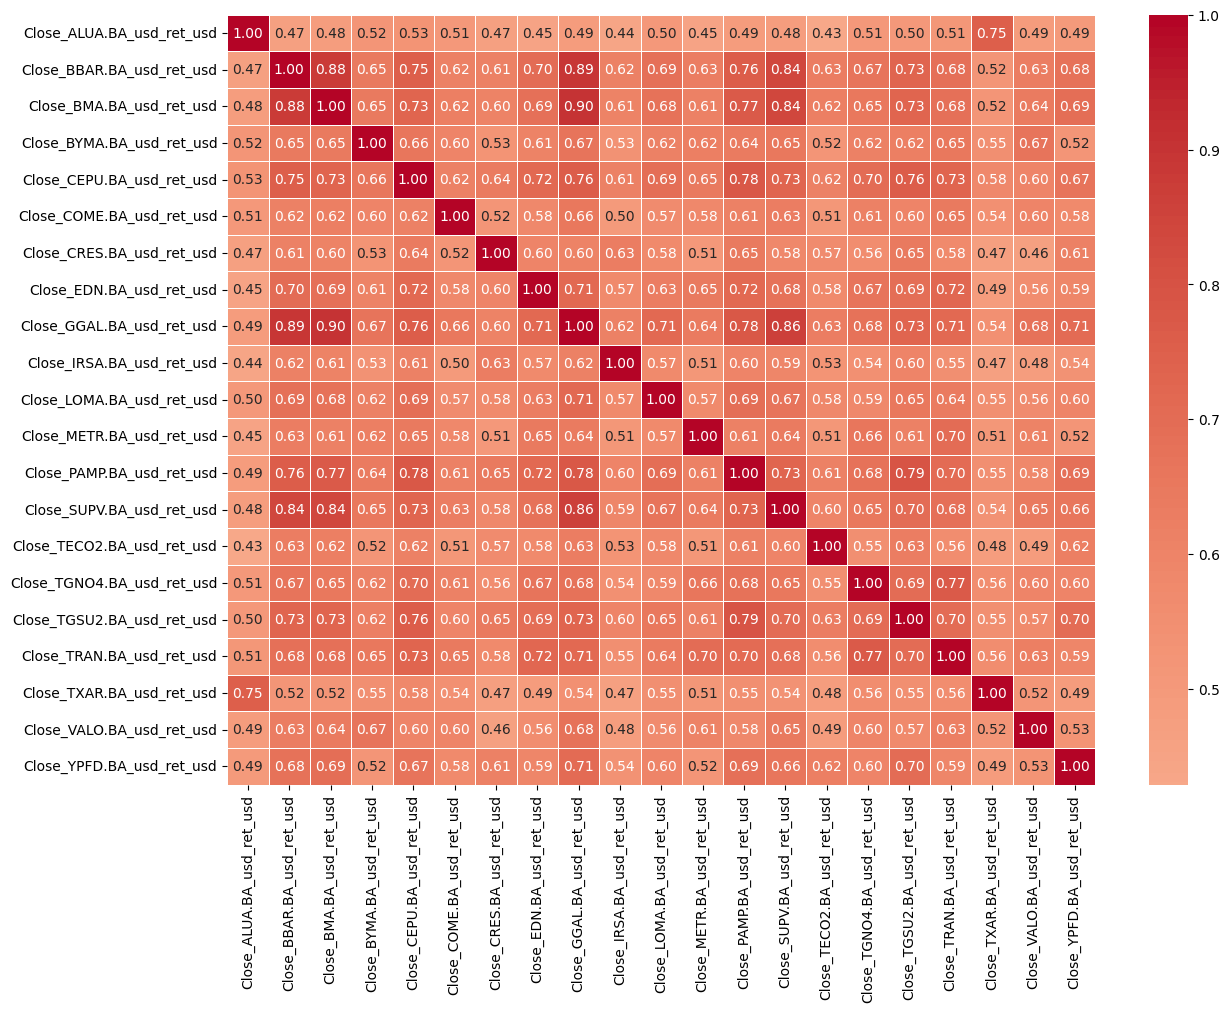

In [119]:
plt.figure(figsize=(14, 10))  # Más ancho y alto

sns.heatmap(matriz_correlacion,
            annot=True,
            fmt=".2f",
            cmap="coolwarm",
            center=0,
            linewidths=0.5,
            linecolor='white')

In [ ]:
# Son correlaciones altas pero mas razonables que las vistas en el activo puro